In [1]:
from kuramoto.SDL_SVP import SDL_SVP
from kuramoto.SDL_BCD import SDL_BCD
from kuramoto.SNMF import SNMF
from kuramoto.LMF import LMF
from kuramoto.nmf import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [2]:
sampling_alg = 'pivot'

ntwk = 'UCLA26' # COVID_PPI, Wisconsin87, Caltech36, UCLA26
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
save_folder = 'images/'
k1 = 20
k2 = 40

path = "../Data/Networks_all_NDL/" + str(ntwk) + '.txt'
G = nn.NNetwork()
G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
print('num nodes in G', len(G.nodes()))
print('num edges in G', len(G.get_edges()))

num nodes in G 20467
num edges in G 1495226


num of subgraphs induced on k-paths: 900
num of subgraphs induced on k-paths: 900
X.shape (400, 900)
X.shape (1600, 900)


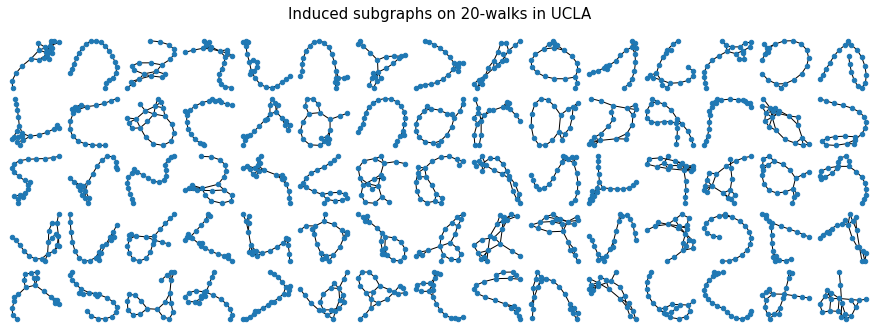

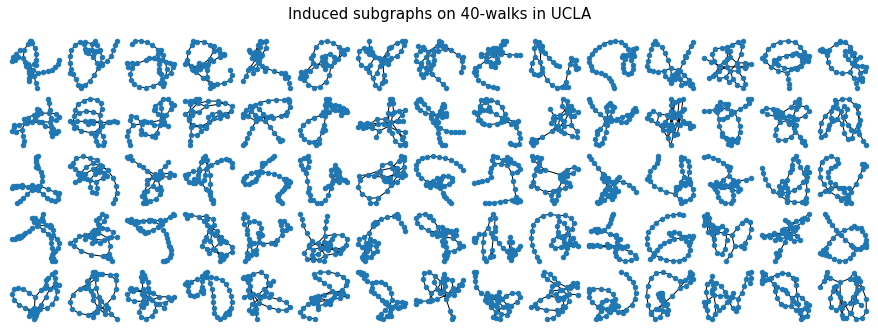

In [3]:
X1, embs1 = G.get_patches(k=k1, sample_size=900, skip_folded_hom=True)
X2, embs2 = G.get_patches(k=k2, sample_size=900, skip_folded_hom=True)

display_graphs(title='Induced subgraphs on {}-walks in {}'.format(k1, ntwk_nonumber),
                 save_path=save_folder + ntwk_nonumber + "_subgraphs_"+ str(sampling_alg) + "_walk", 
                 data = [X1, embs1],
                 grid_shape = [5, 15],
                 fig_size = [15, 5],
                 show_importance=False)

display_graphs(title='Induced subgraphs on {}-walks in {}'.format(k2, ntwk_nonumber),
                 save_path=save_folder + ntwk_nonumber + "_subgraphs_"+ str(sampling_alg) + "_walk", 
                 data = [X2, embs2],
                 grid_shape = [5, 15],
                 fig_size = [15, 5],
                 show_importance=False)

In [4]:
graph_list1 = generate_nxg(X1)
graph_list2 = generate_nxg(X2)

In [5]:
nodes = int(np.sqrt(X1.shape[0]))
df1 = pd.DataFrame()
K = 5

for G in graph_list1:
        
    if nx.is_connected(G):

        adj_mat = nx.to_numpy_array(G)
        temp = pd.DataFrame(np.array(nx.adjacency_matrix(G).todense().flatten('C')))
        
        model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)

        sim = model.run(adj_mat)
        arr = sim.T[-1]
        conc = pd.DataFrame(pd.Series(synchronization(arr)), columns=['Synchronized'])
            
        temp = pd.concat([temp, conc], axis=1)

        df1 = pd.concat([df1, temp], ignore_index=True)
    
df1

0    1    2    3    4    5    6    7    8    9  ...  391  392  393  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
895  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
896  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
897  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
898  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
899  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   

     394  395  396  397  398  399  Synchronized  
0    0.0  0.0  0.0  0.0  1.0  0.0          True  
1    0.0  0.0  0.0  0.0  1.0  0.0         False  
2    0.0  0.0  0.0  0.0  1.0  0.0          True  
3    0.0  0.0  0.0  0.0  1.0  0.0          True  
4    0.0  0.0  0.0  0.0  1.0  0.0         False  
..   ...  ...  ...  ...  ...  ...           ...  
895  0.0  0.0  0.0  0.0  1.0  0.0         False  
896  0.0  0.0  0.0  0.0  1.0  0.0          True  
897  0.0  0.0  0.0  0.0  1.0  0.0         False  
898  0.0  0.0  0.0  0.0  1.0  0.0          True  
899  0.0  0.0  0.0  1.0  1.0  0.0          True  

[900 rows x 401 columns]

In [6]:
print(f"% of synchronized cases: {sum(df1['Synchronized'])/len(df1)}")

% of synchronized cases: 0.5077777777777778


In [7]:
nodes = int(np.sqrt(X2.shape[0]))
df2 = pd.DataFrame()
K = 7.5

for G in graph_list2:
        
    if nx.is_connected(G):

        adj_mat = nx.to_numpy_array(G)
        temp = pd.DataFrame(np.array(nx.adjacency_matrix(G).todense().flatten('C')))
        
        model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)

        sim = model.run(adj_mat)
        arr = sim.T[-1]
        conc = pd.DataFrame(pd.Series(synchronization(arr)), columns=['Synchronized'])
            
        temp = pd.concat([temp, conc], axis=1)

        df2 = pd.concat([df2, temp], ignore_index=True)
    
df2

0    1    2    3    4    5    6    7    8    9  ...  1591  1592  1593  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
1    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
895  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
896  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
897  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
898  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
899  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

     1594  1595  1596  1597  1598  1599  Synchronized  
0     0.0   0.0   0.0   0.0   1.0   0.0         False  
1     0.0   0.0   0.0   0.0   1.0   0.0         False  
2     0.0   0.0   0.0   0.0   1.0   0.0         False  
3     0.0   0.0   0.0   0.0   1.0   0.0         False  
4     0.0   0.0   0.0   0.0   1.0   0.0         False  
..    ...   ...   ...   ...   ...   ...           ...  
895   1.0   0.0   0.0   1.0   1.0   0.0         False  
896   0.0   0.0   0.0   0.0   1.0   0.0         False  
897   0.0   0.0   0.0   0.0   1.0   0.0         False  
898   0.0   1.0   0.0   1.0   1.0   0.0         False  
899   0.0   0.0   0.0   1.0   1.0   0.0         False  

[900 rows x 1601 columns]

In [8]:
print(f"% of synchronized cases: {sum(df2['Synchronized'])/len(df2)}")

% of synchronized cases: 0.45111111111111113


In [9]:
X20 = df1.drop(['Synchronized'], axis=1).values
Y20 = df1['Synchronized'].values.reshape(-1,1)

X40 = df2.drop(['Synchronized'], axis=1).values
Y40 = df2['Synchronized'].values.reshape(-1,1)

In [10]:
X20_train, X20_test, Y20_train, Y20_test = train_test_split(X20, Y20, 
                                                            test_size=0.25)

X40_train, X40_test, Y40_train, Y40_test = train_test_split(X40, Y40, 
                                                            test_size=0.25)

## SDL_BCD - Feature-based

In [11]:
# SDL_BCD_feature
data_scale=10
results_dict_list20 = []
iteration1 = 200
r = 16

# Cross-validation
xi_list = [0, 0.1, 1, 5, 10]
beta = 1
iter_avg = 2

for j in range(len(xi_list)):
    xi = xi_list[j]
    for i in range(iter_avg):
        data_scale=500
        SDL_BCD_class20 = SDL_BCD(X = [X20_train.T/data_scale, Y20_train.T],
                                X_test = [X20_test.T/data_scale, Y20_test.T],
                                n_components = r,
                                xi = xi,
                                L1_reg = [0,0,0],
                                L2_reg = [0,0,0],
                                nonnegativity = [True,True,False],
                                full_dim = False)

        results_dict_new20 = SDL_BCD_class20.fit(option = "feature",
                                             iter = iteration1, 
                                             subsample_size = None,
                                             beta = beta,
                                             update_nuance_param = False,
                                             if_compute_recons_error = True, 
                                             if_validate = False)

initial loading beta [[ 0.55949661  0.65463502 -0.06111543 -0.2840371   0.96522468  0.1361083
   0.62919895  0.17578354  0.66821092  0.31546148 -0.75675329 -0.08267516
  -0.91443167  0.97128459 -0.89923359 -0.29808971 -0.17537749]]


  3%|█▎                                         | 6/200 [00:00<00:03, 55.20it/s]

--- Training --- [threshold, AUC] =  [0.336, 0.611]
--- Iteration 0: Training loss --- [Data, Label, Total] = [226.367867.3, 507.438169.3, 507.438169.3]


  5%|██                                        | 10/200 [00:00<00:03, 51.49it/s]


--- Training --- [threshold, AUC] =  [0.002, 0.636]
--- Iteration 10: Training loss --- [Data, Label, Total] = [270.808395.3, 2068.870210.3, 2068.870210.3]
Early stopping: training loss increased
!!! pred_type naive
initial loading beta [[ 0.06176664 -0.1731922  -0.14700032  0.68179344  0.24143092  0.48280206
  -0.46368133 -0.89183668  0.6363955  -0.6316611   0.64911528  0.64997907
   0.8299021   0.92440409 -0.03811781 -0.25601527 -0.60288574]]


  4%|█▌                                         | 7/200 [00:00<00:02, 68.39it/s]

--- Training --- [threshold, AUC] =  [1.542, 0.389]
--- Iteration 0: Training loss --- [Data, Label, Total] = [230.887247.3, 469.966569.3, 469.966569.3]


  5%|██                                        | 10/200 [00:00<00:03, 57.70it/s]

--- Training --- [threshold, AUC] =  [0.83, 0.648]
--- Iteration 10: Training loss --- [Data, Label, Total] = [264.611119.3, 658.488996.3, 658.488996.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[-0.59812902  0.82871853  0.80152732  0.12682193  0.5985064  -0.09805894
   0.28567085  0.37690309 -0.21527137 -0.19507853  0.84685063 -0.2137845
  -0.40638606 -0.00439914  0.76153797  0.25616045  0.6225227 ]]


  4%|█▉                                         | 9/200 [00:00<00:02, 87.03it/s]

--- Training --- [threshold, AUC] =  [0.627, 0.61]
--- Iteration 0: Training loss --- [Data, Label, Total] = [214.531031.3, 489.563351.3, 511.016454.3]


  5%|██                                        | 10/200 [00:00<00:02, 74.32it/s]

--- Training --- [threshold, AUC] =  [0.99, 0.639]
--- Iteration 10: Training loss --- [Data, Label, Total] = [237.396387.3, 1563.642020.3, 1587.381659.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[-0.76885609 -0.44620251  0.02630624 -0.8691927   0.93357795  0.23015687
   0.84868086 -0.58550344 -0.65905396  0.21383248 -0.13707661  0.81874831
  -0.55658873  0.60830229  0.05774203  0.25440051  0.33823788]]


  4%|█▋                                         | 8/200 [00:00<00:02, 72.14it/s]

--- Training --- [threshold, AUC] =  [1.457, 0.392]
--- Iteration 0: Training loss --- [Data, Label, Total] = [226.844277.3, 470.598093.3, 493.282520.3]


  5%|██                                        | 10/200 [00:00<00:02, 64.33it/s]

--- Training --- [threshold, AUC] =  [0.046, 0.487]
--- Iteration 10: Training loss --- [Data, Label, Total] = [265.225058.3, 1060.309382.3, 1086.831887.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[ 0.41700816 -0.279619    0.68624275  0.25537718 -0.38156178 -0.2290476
  -0.10692344  0.1764904   0.44905773 -0.42869512  0.3383679  -0.7903146
   0.6475769   0.75037716  0.51463787  0.92756023  0.04584912]]


  4%|█▋                                         | 8/200 [00:00<00:02, 69.62it/s]

--- Training --- [threshold, AUC] =  [0.628, 0.39]
--- Iteration 0: Training loss --- [Data, Label, Total] = [215.395692.3, 489.935148.3, 705.330840.3]


  5%|██                                        | 10/200 [00:00<00:03, 58.90it/s]

--- Training --- [threshold, AUC] =  [0.949, 0.44]
--- Iteration 10: Training loss --- [Data, Label, Total] = [143.366777.3, 1020.116524.3, 1163.483301.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[-0.60439441  0.80045767  0.25245184  0.04514693 -0.79443991 -0.75762731
  -0.23827043 -0.65116308  0.51926964 -0.2191733   0.43344049  0.50336766
  -0.8741104  -0.70913927  0.22070699  0.80506386 -0.93461836]]


  4%|█▋                                         | 8/200 [00:00<00:02, 76.43it/s]

--- Training --- [threshold, AUC] =  [1.489, 0.388]
--- Iteration 0: Training loss --- [Data, Label, Total] = [213.507364.3, 468.088416.3, 681.595780.3]
--- Training --- [threshold, AUC] =  [0.264, 0.464]
--- Iteration 10: Training loss --- [Data, Label, Total] = [133.488082.3, 554.640102.3, 688.128183.3]


 12%|█████                                     | 24/200 [00:00<00:02, 71.34it/s]

--- Training --- [threshold, AUC] =  [0.243, 0.484]
--- Iteration 20: Training loss --- [Data, Label, Total] = [75.847396.3, 573.217945.3, 649.065341.3]


 16%|██████▋                                   | 32/200 [00:00<00:02, 71.57it/s]

--- Training --- [threshold, AUC] =  [0.246, 0.501]
--- Iteration 30: Training loss --- [Data, Label, Total] = [39.882775.3, 570.012879.3, 609.895654.3]


 20%|████████▍                                 | 40/200 [00:00<00:02, 73.23it/s]

--- Training --- [threshold, AUC] =  [0.254, 0.518]
--- Iteration 40: Training loss --- [Data, Label, Total] = [21.347587.3, 562.737650.3, 584.085237.3]


 24%|██████████                                | 48/200 [00:00<00:02, 73.36it/s]

--- Training --- [threshold, AUC] =  [0.26, 0.482]
--- Iteration 50: Training loss --- [Data, Label, Total] = [11.656068.3, 557.534063.3, 569.190131.3]


 28%|███████████▊                              | 56/200 [00:00<00:02, 71.44it/s]

--- Training --- [threshold, AUC] =  [0.265, 0.456]
--- Iteration 60: Training loss --- [Data, Label, Total] = [6.734065.3, 553.810982.3, 560.545047.3]


 36%|██████████████▉                           | 71/200 [00:01<00:02, 64.15it/s]

--- Training --- [threshold, AUC] =  [0.267, 0.466]
--- Iteration 70: Training loss --- [Data, Label, Total] = [3.896895.3, 551.967701.3, 555.864596.3]


 40%|████████████████▌                         | 79/200 [00:01<00:01, 64.44it/s]

--- Training --- [threshold, AUC] =  [0.271, 0.45]
--- Iteration 80: Training loss --- [Data, Label, Total] = [2.420828.3, 548.599953.3, 551.020781.3]


 46%|███████████████████▌                      | 93/200 [00:01<00:02, 53.16it/s]

--- Training --- [threshold, AUC] =  [0.275, 0.451]
--- Iteration 90: Training loss --- [Data, Label, Total] = [1.405837.3, 545.456197.3, 546.862033.3]


 52%|█████████████████████▎                   | 104/200 [00:01<00:02, 39.08it/s]

--- Training --- [threshold, AUC] =  [0.279, 0.444]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.838494.3, 542.768899.3, 543.607393.3]


 57%|███████████████████████▎                 | 114/200 [00:02<00:02, 37.09it/s]

--- Training --- [threshold, AUC] =  [0.281, 0.456]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.487767.3, 540.814471.3, 541.302239.3]


 64%|██████████████████████████▍              | 129/200 [00:02<00:01, 41.20it/s]

--- Training --- [threshold, AUC] =  [0.284, 0.458]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.301042.3, 539.099258.3, 539.400301.3]
--- Training --- [threshold, AUC] =  [0.287, 0.495]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.179870.3, 536.696361.3, 536.876230.3]


 74%|██████████████████████████████▎          | 148/200 [00:02<00:00, 52.29it/s]

--- Training --- [threshold, AUC] =  [0.289, 0.529]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.111174.3, 535.131471.3, 535.242645.3]
--- Training --- [threshold, AUC] =  [0.291, 0.604]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.079785.3, 533.749881.3, 533.829665.3]


 84%|██████████████████████████████████▋      | 169/200 [00:03<00:00, 59.86it/s]

--- Training --- [threshold, AUC] =  [0.294, 0.683]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.059119.3, 532.178368.3, 532.237486.3]
--- Training --- [threshold, AUC] =  [0.296, 0.729]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.048565.3, 530.684633.3, 530.733199.3]


 97%|███████████████████████████████████████▊ | 194/200 [00:03<00:00, 70.05it/s]

--- Training --- [threshold, AUC] =  [0.297, 0.741]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.042751.3, 530.154005.3, 530.196757.3]
--- Training --- [threshold, AUC] =  [0.299, 0.738]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.039344.3, 528.799498.3, 528.838841.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 56.45it/s]


!!! pred_type naive
initial loading beta [[-0.87333321  0.20273639  0.69835708  0.58722433  0.56631049 -0.14148334
  -0.39916487 -0.24241824 -0.05899081  0.15418124  0.82983407 -0.85433014
   0.76814506  0.40974648 -0.84021463 -0.41133932 -0.38556215]]


  4%|█▌                                         | 7/200 [00:00<00:02, 66.07it/s]

--- Training --- [threshold, AUC] =  [0.37, 0.609]
--- Iteration 0: Training loss --- [Data, Label, Total] = [180.137571.3, 492.421450.3, 1393.109306.3]


  7%|██▉                                       | 14/200 [00:00<00:02, 64.76it/s]

--- Training --- [threshold, AUC] =  [0.062, 0.627]
--- Iteration 10: Training loss --- [Data, Label, Total] = [105.690557.3, 965.040029.3, 1493.492815.3]


 10%|████▍                                     | 21/200 [00:00<00:02, 61.01it/s]

--- Training --- [threshold, AUC] =  [0.099, 0.648]
--- Iteration 20: Training loss --- [Data, Label, Total] = [40.707279.3, 819.641012.3, 1023.177409.3]


 14%|██████                                    | 29/200 [00:00<00:02, 65.55it/s]

--- Training --- [threshold, AUC] =  [0.109, 0.661]
--- Iteration 30: Training loss --- [Data, Label, Total] = [10.877920.3, 789.973383.3, 844.362984.3]


 22%|█████████▏                                | 44/200 [00:00<00:02, 68.55it/s]

--- Training --- [threshold, AUC] =  [0.116, 0.676]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.076361.3, 772.193065.3, 772.574871.3]


 26%|██████████▋                               | 51/200 [00:00<00:02, 66.38it/s]

--- Training --- [threshold, AUC] =  [0.122, 0.684]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.042522.3, 755.788358.3, 756.000966.3]


 30%|████████████▍                             | 59/200 [00:00<00:02, 67.54it/s]

--- Training --- [threshold, AUC] =  [0.128, 0.686]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.034011.3, 743.183282.3, 743.353339.3]


 36%|███████████████▎                          | 73/200 [00:01<00:01, 63.77it/s]

--- Training --- [threshold, AUC] =  [0.133, 0.688]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.033812.3, 731.782558.3, 731.951617.3]


 40%|████████████████▊                         | 80/200 [00:01<00:01, 63.47it/s]

--- Training --- [threshold, AUC] =  [0.137, 0.69]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.033718.3, 724.201629.3, 724.370220.3]


 48%|████████████████████▏                     | 96/200 [00:01<00:01, 68.13it/s]

--- Training --- [threshold, AUC] =  [0.14, 0.691]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.033680.3, 716.636032.3, 716.804431.3]


 52%|█████████████████████                    | 103/200 [00:01<00:01, 67.64it/s]

--- Training --- [threshold, AUC] =  [0.143, 0.692]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.033656.3, 711.511721.3, 711.680002.3]


 56%|██████████████████████▊                  | 111/200 [00:01<00:01, 68.51it/s]

--- Training --- [threshold, AUC] =  [0.145, 0.693]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.033638.3, 707.416845.3, 707.585036.3]


 59%|████████████████████████▏                | 118/200 [00:01<00:01, 68.54it/s]

--- Training --- [threshold, AUC] =  [0.147, 0.694]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.033626.3, 703.549710.3, 703.717838.3]


 68%|███████████████████████████▋             | 135/200 [00:01<00:00, 75.10it/s]

--- Training --- [threshold, AUC] =  [0.149, 0.695]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.033616.3, 699.728912.3, 699.896990.3]


 72%|█████████████████████████████▎           | 143/200 [00:02<00:00, 74.39it/s]

--- Training --- [threshold, AUC] =  [0.151, 0.695]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.033607.3, 696.562082.3, 696.730119.3]


 76%|██████████████████████████████▉          | 151/200 [00:02<00:00, 73.07it/s]

--- Training --- [threshold, AUC] =  [0.152, 0.696]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.033600.3, 693.611885.3, 693.779885.3]


 80%|████████████████████████████████▊        | 160/200 [00:02<00:00, 76.33it/s]

--- Training --- [threshold, AUC] =  [0.154, 0.696]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.033594.3, 690.311537.3, 690.479507.3]


 84%|██████████████████████████████████▍      | 168/200 [00:02<00:00, 76.31it/s]

--- Training --- [threshold, AUC] =  [0.156, 0.697]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.033590.3, 687.531972.3, 687.699923.3]


 92%|█████████████████████████████████████▋   | 184/200 [00:02<00:00, 74.44it/s]

--- Training --- [threshold, AUC] =  [0.157, 0.697]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.033586.3, 684.324031.3, 684.491961.3]


 96%|███████████████████████████████████████▎ | 192/200 [00:02<00:00, 73.50it/s]

--- Training --- [threshold, AUC] =  [0.159, 0.698]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.033582.3, 682.068529.3, 682.236438.3]


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 70.00it/s]


!!! pred_type naive
initial loading beta [[-0.59907162  0.54213481 -0.29340143 -0.08663289 -0.57915173 -0.84441852
  -0.02833989 -0.4813566   0.28334596  0.60937719  0.76324937 -0.69691313
   0.54892216 -0.00789437 -0.26870203 -0.4318871  -0.42342569]]


  4%|█▋                                         | 8/200 [00:00<00:02, 72.16it/s]

--- Training --- [threshold, AUC] =  [1.371, 0.39]
--- Iteration 0: Training loss --- [Data, Label, Total] = [181.636231.3, 491.935084.3, 1400.116241.3]


  5%|██                                        | 10/200 [00:00<00:03, 62.00it/s]


--- Training --- [threshold, AUC] =  [0.015, 0.589]
--- Iteration 10: Training loss --- [Data, Label, Total] = [98.472381.3, 1423.770964.3, 1916.132869.3]
Early stopping: training loss increased
!!! pred_type naive
initial loading beta [[ 0.43425793 -0.73236937 -0.85358606  0.71529153  0.00152332 -0.87651435
   0.53924866 -0.71379495 -0.24101626 -0.69491148  0.41755602 -0.84464306
  -0.1768435   0.37100781  0.14363074 -0.78147376 -0.33828255]]


  2%|█                                          | 5/200 [00:00<00:04, 43.09it/s]

--- Training --- [threshold, AUC] =  [0.321, 0.389]
--- Iteration 0: Training loss --- [Data, Label, Total] = [186.745175.3, 515.541858.3, 2382.993613.3]


  6%|██▎                                       | 11/200 [00:00<00:03, 49.25it/s]

--- Training --- [threshold, AUC] =  [0.019, 0.654]
--- Iteration 10: Training loss --- [Data, Label, Total] = [95.366916.3, 1344.055787.3, 2297.724945.3]


 10%|███▉                                      | 19/200 [00:00<00:03, 59.32it/s]

--- Training --- [threshold, AUC] =  [0.024, 0.648]
--- Iteration 20: Training loss --- [Data, Label, Total] = [52.095428.3, 1269.316252.3, 1790.270531.3]


 17%|███████▏                                  | 34/200 [00:00<00:02, 65.70it/s]

--- Training --- [threshold, AUC] =  [0.025, 0.549]
--- Iteration 30: Training loss --- [Data, Label, Total] = [2.381391.3, 1259.498705.3, 1283.312616.3]


 20%|████████▌                                 | 41/200 [00:00<00:02, 65.48it/s]

--- Training --- [threshold, AUC] =  [0.028, 0.669]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.071943.3, 1217.662054.3, 1218.381488.3]


 24%|██████████▎                               | 49/200 [00:00<00:02, 68.48it/s]

--- Training --- [threshold, AUC] =  [0.031, 0.682]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.036195.3, 1183.329126.3, 1183.691077.3]


 32%|█████████████▋                            | 65/200 [00:00<00:01, 71.02it/s]

--- Training --- [threshold, AUC] =  [0.034, 0.682]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.035997.3, 1158.960183.3, 1159.320154.3]


 37%|███████████████▌                          | 74/200 [00:01<00:01, 74.68it/s]

--- Training --- [threshold, AUC] =  [0.036, 0.683]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.035929.3, 1140.800306.3, 1141.159592.3]


 41%|█████████████████▏                        | 82/200 [00:01<00:01, 72.91it/s]

--- Training --- [threshold, AUC] =  [0.038, 0.685]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.035876.3, 1124.499956.3, 1124.858716.3]


 45%|██████████████████▉                       | 90/200 [00:01<00:01, 73.45it/s]

--- Training --- [threshold, AUC] =  [0.039, 0.686]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.035824.3, 1113.630902.3, 1113.989147.3]


 54%|█████████████████████▉                   | 107/200 [00:01<00:01, 76.35it/s]

--- Training --- [threshold, AUC] =  [0.04, 0.686]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.035777.3, 1102.298723.3, 1102.656498.3]


 57%|███████████████████████▌                 | 115/200 [00:01<00:01, 75.14it/s]

--- Training --- [threshold, AUC] =  [0.042, 0.687]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.035725.3, 1092.316650.3, 1092.673903.3]


 62%|█████████████████████████▏               | 123/200 [00:01<00:01, 76.18it/s]

--- Training --- [threshold, AUC] =  [0.043, 0.688]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.035675.3, 1084.498155.3, 1084.854908.3]


 66%|██████████████████████████▊              | 131/200 [00:01<00:00, 77.02it/s]

--- Training --- [threshold, AUC] =  [0.044, 0.688]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.035624.3, 1076.523238.3, 1076.879475.3]


 70%|████████████████████████████▋            | 140/200 [00:01<00:00, 78.83it/s]

--- Training --- [threshold, AUC] =  [0.045, 0.689]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.035574.3, 1069.053509.3, 1069.409252.3]


 78%|███████████████████████████████▉         | 156/200 [00:02<00:00, 76.44it/s]

--- Training --- [threshold, AUC] =  [0.046, 0.689]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.035526.3, 1062.642261.3, 1062.997523.3]


 82%|█████████████████████████████████▌       | 164/200 [00:02<00:00, 73.72it/s]

--- Training --- [threshold, AUC] =  [0.046, 0.689]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.035481.3, 1057.663927.3, 1058.018738.3]


 86%|███████████████████████████████████▎     | 172/200 [00:02<00:00, 69.10it/s]

--- Training --- [threshold, AUC] =  [0.047, 0.69]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.035435.3, 1052.925712.3, 1053.280064.3]


 90%|████████████████████████████████████▉    | 180/200 [00:02<00:00, 69.23it/s]

--- Training --- [threshold, AUC] =  [0.048, 0.691]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.035391.3, 1047.393322.3, 1047.747233.3]


 94%|██████████████████████████████████████▌  | 188/200 [00:02<00:00, 70.20it/s]

--- Training --- [threshold, AUC] =  [0.048, 0.691]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.035345.3, 1043.323167.3, 1043.676621.3]


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 71.19it/s]


!!! pred_type naive
initial loading beta [[ 0.34419889  0.61024267 -0.985646    0.02036007  0.30050581  0.77360894
   0.06130565  0.19844186 -0.93942305  0.70369568  0.77183922  0.88875514
   0.3763685   0.76347586  0.22367033  0.02350173 -0.34614667]]


  4%|█▋                                         | 8/200 [00:00<00:02, 74.77it/s]

--- Training --- [threshold, AUC] =  [0.27, 0.612]
--- Iteration 0: Training loss --- [Data, Label, Total] = [179.385223.3, 549.850509.3, 2343.702736.3]
--- Training --- [threshold, AUC] =  [0.018, 0.632]
--- Iteration 10: Training loss --- [Data, Label, Total] = [97.433725.3, 1369.066826.3, 2343.404078.3]


 12%|█████                                     | 24/200 [00:00<00:02, 71.06it/s]

--- Training --- [threshold, AUC] =  [0.007, 0.669]
--- Iteration 20: Training loss --- [Data, Label, Total] = [51.341601.3, 1680.841059.3, 2194.257069.3]


 16%|██████▋                                   | 32/200 [00:00<00:02, 69.64it/s]

--- Training --- [threshold, AUC] =  [0.011, 0.667]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.461978.3, 1531.627578.3, 1536.247354.3]


 20%|████████▏                                 | 39/200 [00:00<00:02, 64.22it/s]

--- Training --- [threshold, AUC] =  [0.014, 0.685]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.093539.3, 1452.481118.3, 1453.416512.3]


 27%|███████████▎                              | 54/200 [00:00<00:02, 66.59it/s]

--- Training --- [threshold, AUC] =  [0.016, 0.683]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.036387.3, 1400.666132.3, 1401.030000.3]


 30%|████████████▊                             | 61/200 [00:00<00:02, 66.99it/s]

--- Training --- [threshold, AUC] =  [0.018, 0.684]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.036233.3, 1366.476775.3, 1366.839102.3]


 34%|██████████████▎                           | 68/200 [00:01<00:02, 64.90it/s]

--- Training --- [threshold, AUC] =  [0.02, 0.685]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.036184.3, 1340.392663.3, 1340.754499.3]


 38%|███████████████▊                          | 75/200 [00:01<00:02, 62.02it/s]

--- Training --- [threshold, AUC] =  [0.021, 0.685]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.036144.3, 1317.652834.3, 1318.014277.3]


 50%|████████████████████▋                    | 101/200 [00:01<00:01, 52.66it/s]

--- Training --- [threshold, AUC] =  [0.022, 0.686]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.036107.3, 1301.581874.3, 1301.942940.3]
--- Training --- [threshold, AUC] =  [0.023, 0.687]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.036073.3, 1286.932412.3, 1287.293142.3]


 60%|████████████████████████▊                | 121/200 [00:02<00:01, 56.15it/s]

--- Training --- [threshold, AUC] =  [0.024, 0.687]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.036038.3, 1272.850017.3, 1273.210393.3]
--- Training --- [threshold, AUC] =  [0.025, 0.687]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.036000.3, 1262.883967.3, 1263.243967.3]


 72%|█████████████████████████████▋           | 145/200 [00:02<00:00, 68.76it/s]

--- Training --- [threshold, AUC] =  [0.025, 0.688]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.035967.3, 1252.770689.3, 1253.130361.3]
--- Training --- [threshold, AUC] =  [0.026, 0.689]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.035936.3, 1244.632722.3, 1244.992078.3]


 81%|█████████████████████████████████▏       | 162/200 [00:02<00:00, 75.06it/s]

--- Training --- [threshold, AUC] =  [0.027, 0.689]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.035900.3, 1236.568823.3, 1236.927823.3]
--- Training --- [threshold, AUC] =  [0.027, 0.689]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.035869.3, 1230.475952.3, 1230.834647.3]


 94%|██████████████████████████████████████▎  | 187/200 [00:02<00:00, 77.52it/s]

--- Training --- [threshold, AUC] =  [0.028, 0.69]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.035836.3, 1224.554998.3, 1224.913357.3]
--- Training --- [threshold, AUC] =  [0.028, 0.69]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.035805.3, 1218.805417.3, 1219.163468.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 65.42it/s]


--- Training --- [threshold, AUC] =  [0.029, 0.69]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.035775.3, 1213.918873.3, 1214.276623.3]
!!! pred_type naive


In [56]:
W = results_dict_new20['loading'][0]
coeff = results_dict_new20['loading'][1][0]
H = results_dict_new20['code']

In [57]:
coeff

array([8.81790406e-03, 4.06777294e-02, 8.19089428e-05, 1.22608802e-04,
       5.34467395e-05, 4.16326444e-05, 2.81613366e-05, 4.12260260e-05,
       2.60971564e-05, 2.41079077e-05, 2.31221267e-05, 3.78123603e-05,
       4.31710450e-05, 1.19911330e-05, 2.95596461e-05, 4.22534428e-05,
       9.89651335e-05])

In [28]:
print('Accuracy: {}'.format(results_dict_new20['Accuracy']))
print('Training RRE: {}'.format(results_dict_new20['Relative_reconstruction_loss (training)']))
print('Testing RRE: {}'.format(results_dict_new20['Relative_reconstruction_loss (test)']))

Accuracy: 0.5511111111111111
Training RRE: 0.25521531527955327
Testing RRE: 0.8805119596320716


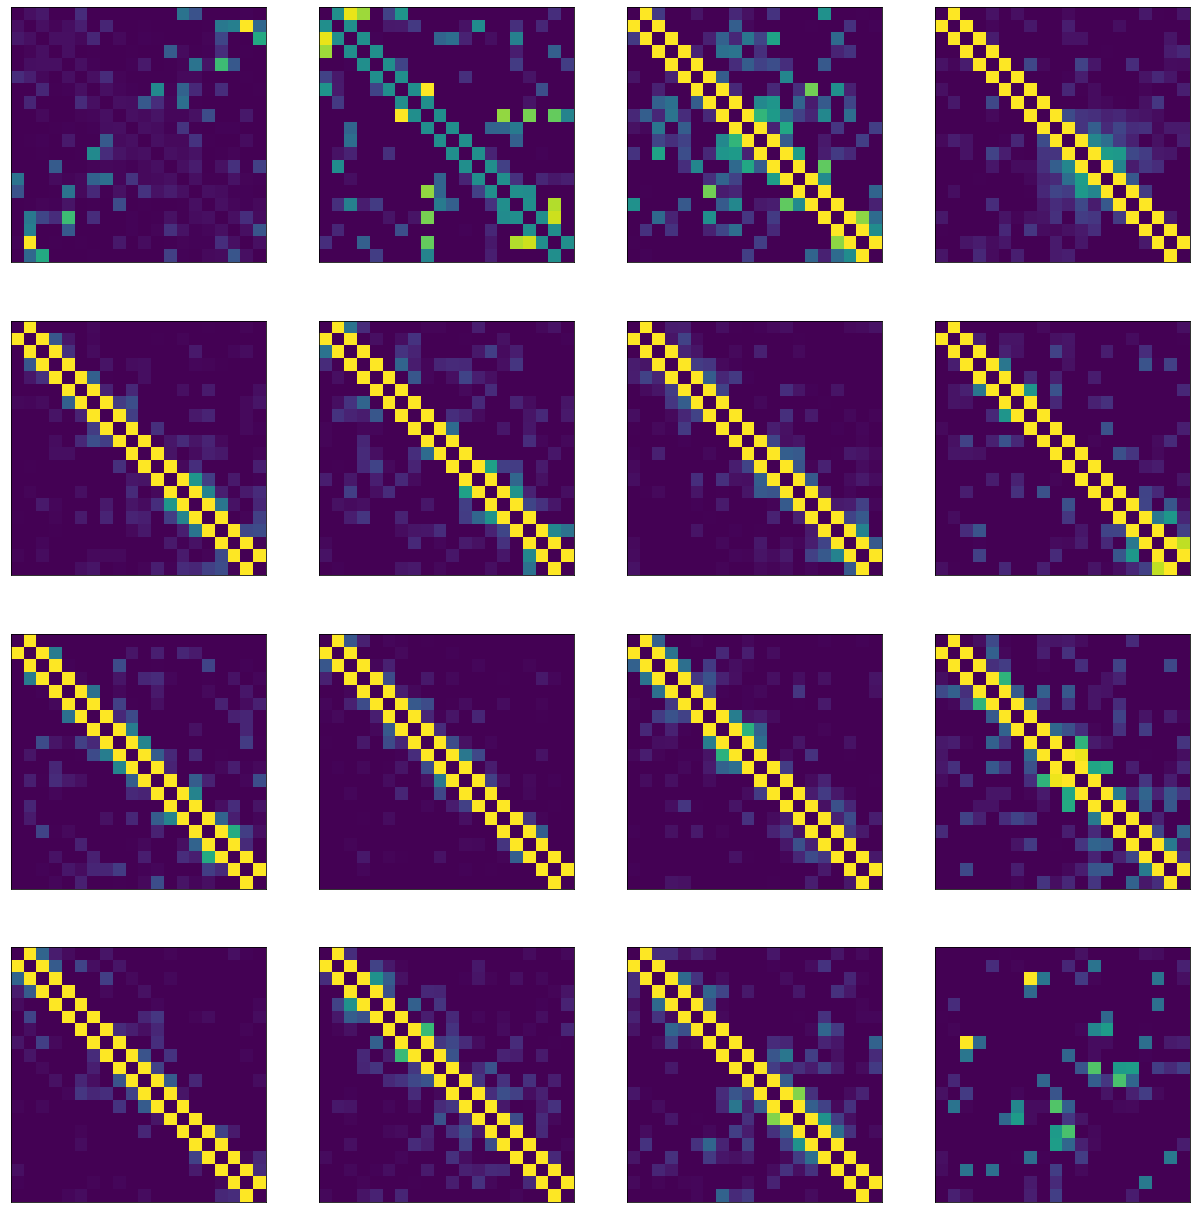

In [14]:
display_dictionary(W = W, figsize=[20,20])

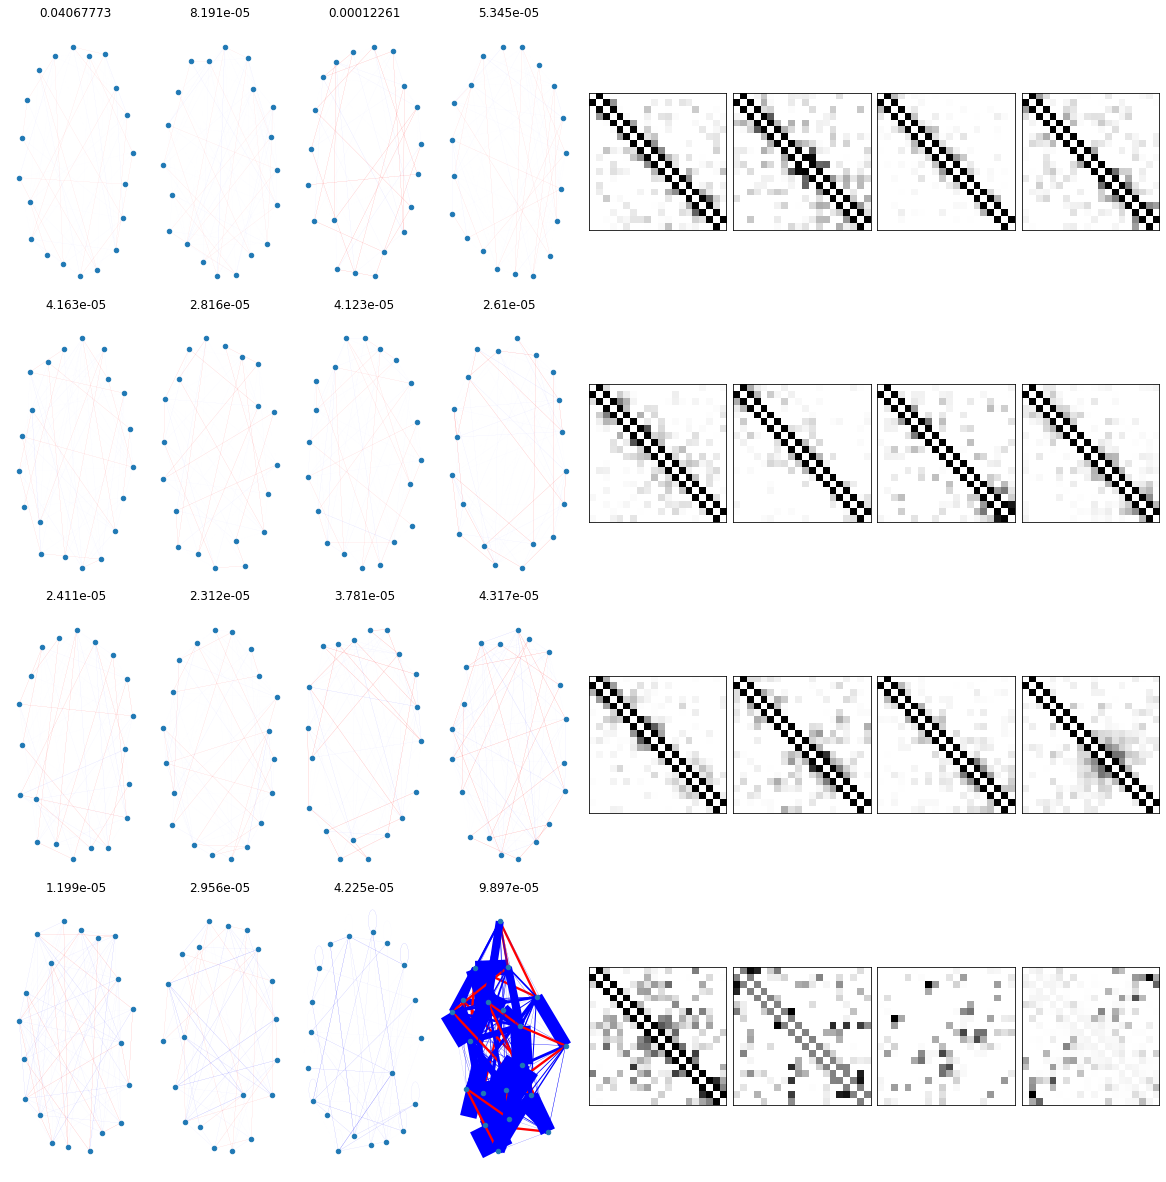

In [15]:
display_dict_and_graph(W = W, 
                       At = np.dot(H, H.T), 
                       regression_coeff = coeff, 
                       weight_graph = 150, 
                       fig_size = [20,20], 
                       show_importance = True)

In [16]:
# SDL_BCD_feature
data_scale=10
results_dict_list40 = []
iteration1 = 200
r = 16

# Cross-validation
xi_list = [0, 0.1, 1, 5, 10]
beta = 1
iter_avg = 2

for j in range(len(xi_list)):
    xi = xi_list[j]
    for i in range(iter_avg):
        data_scale=500
        SDL_BCD_class40 = SDL_BCD(X = [X40_train.T/data_scale, Y40_train.T],
                                X_test = [X40_test.T/data_scale, Y40_test.T],
                                n_components = r,
                                xi = xi,
                                L1_reg = [0,0,0],
                                L2_reg = [0,0,0],
                                nonnegativity = [True,True,False],
                                full_dim = False)

        results_dict_new40 = SDL_BCD_class40.fit(option = "feature",
                                             iter = iteration1, 
                                             subsample_size = None,
                                             beta = beta,
                                             update_nuance_param = False,
                                             if_compute_recons_error = True, 
                                             if_validate = False)

initial loading beta [[-0.530009    0.63703974 -0.00421298  0.49312544 -0.79173922 -0.23480481
  -0.29981156  0.17373463 -0.83712708  0.92028439  0.31484012 -0.62461628
  -0.52779151  0.47230991 -0.22066462  0.2574781   0.06810824]]


  2%|▊                                          | 4/200 [00:00<00:04, 39.36it/s]

--- Training --- [threshold, AUC] =  [0.287, 0.583]
--- Iteration 0: Training loss --- [Data, Label, Total] = [226.545001.3, 508.547933.3, 508.547933.3]


  5%|██                                        | 10/200 [00:00<00:05, 36.66it/s]


--- Training --- [threshold, AUC] =  [0.0, 0.665]
--- Iteration 10: Training loss --- [Data, Label, Total] = [278.301700.3, 2766.648324.3, 2766.648324.3]
Early stopping: training loss increased
!!! pred_type naive
initial loading beta [[-0.79756621  0.94391467  0.91335567 -0.42111689  0.88697908 -0.11785195
   0.06636292  0.58722601 -0.92695742  0.1291964  -0.82834579 -0.59653991
  -0.25307432 -0.43310551  0.2502737  -0.95999309 -0.8032872 ]]


  2%|█                                          | 5/200 [00:00<00:04, 48.75it/s]

--- Training --- [threshold, AUC] =  [0.298, 0.601]
--- Iteration 0: Training loss --- [Data, Label, Total] = [224.657145.3, 502.964795.3, 502.964795.3]


  5%|██                                        | 10/200 [00:00<00:04, 43.05it/s]

--- Training --- [threshold, AUC] =  [0.031, 0.654]
--- Iteration 10: Training loss --- [Data, Label, Total] = [293.167409.3, 1085.800561.3, 1085.800561.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[-0.21475765  0.3693084   0.21526212 -0.54312146 -0.31856018  0.90640534
  -0.51595292 -0.66905275 -0.93410016 -0.63566103  0.23720409  0.19604863
  -0.85590201  0.08603382  0.59249371 -0.60766307  0.32538448]]


  2%|█                                          | 5/200 [00:00<00:04, 48.16it/s]

--- Training --- [threshold, AUC] =  [1.446, 0.398]
--- Iteration 0: Training loss --- [Data, Label, Total] = [213.090190.3, 465.436635.3, 486.745654.3]


  6%|██▎                                       | 11/200 [00:00<00:03, 48.25it/s]

--- Training --- [threshold, AUC] =  [0.357, 0.497]
--- Iteration 10: Training loss --- [Data, Label, Total] = [276.239568.3, 479.433818.3, 507.057775.3]


 14%|██████                                    | 29/200 [00:00<00:03, 49.95it/s]

--- Training --- [threshold, AUC] =  [0.261, 0.542]
--- Iteration 20: Training loss --- [Data, Label, Total] = [269.076546.3, 524.865231.3, 551.772886.3]


 20%|████████▌                                 | 41/200 [00:00<00:03, 49.72it/s]

--- Training --- [threshold, AUC] =  [0.242, 0.572]
--- Iteration 30: Training loss --- [Data, Label, Total] = [260.123286.3, 538.430224.3, 564.442553.3]
--- Training --- [threshold, AUC] =  [0.23, 0.602]
--- Iteration 40: Training loss --- [Data, Label, Total] = [251.150304.3, 548.930931.3, 574.045961.3]


 30%|████████████▌                             | 60/200 [00:01<00:02, 54.11it/s]

--- Training --- [threshold, AUC] =  [0.221, 0.624]
--- Iteration 50: Training loss --- [Data, Label, Total] = [241.119064.3, 556.329171.3, 580.441078.3]
--- Training --- [threshold, AUC] =  [0.214, 0.645]
--- Iteration 60: Training loss --- [Data, Label, Total] = [230.444423.3, 562.927492.3, 585.971934.3]


 36%|██████████████▉                           | 71/200 [00:01<00:02, 46.65it/s]

--- Training --- [threshold, AUC] =  [0.208, 0.664]
--- Iteration 70: Training loss --- [Data, Label, Total] = [220.189422.3, 568.735966.3, 590.754908.3]


 43%|██████████████████                        | 86/200 [00:01<00:03, 37.09it/s]

--- Training --- [threshold, AUC] =  [0.204, 0.683]
--- Iteration 80: Training loss --- [Data, Label, Total] = [209.073218.3, 573.239954.3, 594.147276.3]


 48%|████████████████████▏                     | 96/200 [00:02<00:02, 38.68it/s]

--- Training --- [threshold, AUC] =  [0.199, 0.698]
--- Iteration 90: Training loss --- [Data, Label, Total] = [198.444112.3, 578.526580.3, 598.370992.3]


 53%|█████████████████████▋                   | 106/200 [00:02<00:02, 41.85it/s]

--- Training --- [threshold, AUC] =  [0.195, 0.713]
--- Iteration 100: Training loss --- [Data, Label, Total] = [188.918859.3, 583.174994.3, 602.066880.3]


 58%|███████████████████████▉                 | 117/200 [00:02<00:01, 46.59it/s]

--- Training --- [threshold, AUC] =  [0.193, 0.727]
--- Iteration 110: Training loss --- [Data, Label, Total] = [nan.3, 585.815658.3, nan.3]
--- Training --- [threshold, AUC] =  [0.191, 0.739]
--- Iteration 120: Training loss --- [Data, Label, Total] = [170.190852.3, 587.561108.3, 604.580193.3]


 68%|███████████████████████████▋             | 135/200 [00:02<00:01, 47.60it/s]

--- Training --- [threshold, AUC] =  [0.188, 0.751]
--- Iteration 130: Training loss --- [Data, Label, Total] = [160.231220.3, 591.211579.3, 607.234701.3]


 73%|█████████████████████████████▉           | 146/200 [00:03<00:01, 44.67it/s]

--- Training --- [threshold, AUC] =  [0.187, 0.76]
--- Iteration 140: Training loss --- [Data, Label, Total] = [152.077327.3, 592.454209.3, 607.661942.3]


 78%|████████████████████████████████▏        | 157/200 [00:03<00:00, 45.60it/s]

--- Training --- [threshold, AUC] =  [0.185, 0.766]
--- Iteration 150: Training loss --- [Data, Label, Total] = [143.422308.3, 595.096866.3, 609.439097.3]


 81%|█████████████████████████████████▏       | 162/200 [00:03<00:00, 40.30it/s]

--- Training --- [threshold, AUC] =  [0.183, 0.777]
--- Iteration 160: Training loss --- [Data, Label, Total] = [135.877560.3, 597.495070.3, 611.082826.3]


 88%|████████████████████████████████████▎    | 177/200 [00:04<00:00, 39.62it/s]

--- Training --- [threshold, AUC] =  [0.18, 0.785]
--- Iteration 170: Training loss --- [Data, Label, Total] = [128.868685.3, 600.526680.3, 613.413548.3]


 94%|██████████████████████████████████████▎  | 187/200 [00:04<00:00, 43.81it/s]

--- Training --- [threshold, AUC] =  [0.179, 0.79]
--- Iteration 180: Training loss --- [Data, Label, Total] = [121.400675.3, 601.989850.3, 614.129917.3]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 44.14it/s]

--- Training --- [threshold, AUC] =  [0.178, 0.797]
--- Iteration 190: Training loss --- [Data, Label, Total] = [115.478400.3, 603.559114.3, 615.106954.3]
!!! pred_type naive


initial loading beta [[ 0.64059531  0.12454943 -0.02237238  0.45666134 -0.56231854 -0.49527092
  -0.29049374  0.85755055  0.4442413   0.4473842  -0.81188874  0.08936876
  -0.87999444 -0.70153292 -0.12294459  0.47261185 -0.26834039]]


  2%|▊                                          | 4/200 [00:00<00:05, 37.97it/s]

--- Training --- [threshold, AUC] =  [1.477, 0.403]
--- Iteration 0: Training loss --- [Data, Label, Total] = [220.907450.3, 465.879640.3, 487.970385.3]


 10%|████▍                                     | 21/200 [00:00<00:03, 50.01it/s]

--- Training --- [threshold, AUC] =  [0.319, 0.593]
--- Iteration 10: Training loss --- [Data, Label, Total] = [276.581318.3, 492.783941.3, 520.442073.3]
--- Training --- [threshold, AUC] =  [0.339, 0.653]
--- Iteration 20: Training loss --- [Data, Label, Total] = [257.123289.3, 485.140592.3, 510.852921.3]


 20%|████████▌                                 | 41/200 [00:00<00:03, 52.54it/s]

--- Training --- [threshold, AUC] =  [0.34, 0.685]
--- Iteration 30: Training loss --- [Data, Label, Total] = [239.677731.3, 484.688616.3, 508.656389.3]
--- Training --- [threshold, AUC] =  [0.34, 0.706]
--- Iteration 40: Training loss --- [Data, Label, Total] = [223.048166.3, 484.777188.3, 507.082005.3]


 30%|████████████▍                             | 59/200 [00:01<00:02, 52.07it/s]

--- Training --- [threshold, AUC] =  [0.342, 0.719]
--- Iteration 50: Training loss --- [Data, Label, Total] = [207.790295.3, 484.067059.3, 504.846089.3]
--- Training --- [threshold, AUC] =  [0.338, 0.737]
--- Iteration 60: Training loss --- [Data, Label, Total] = [194.554905.3, 485.442933.3, 504.898424.3]


 38%|████████████████▏                         | 77/200 [00:01<00:02, 49.39it/s]

--- Training --- [threshold, AUC] =  [0.335, 0.747]
--- Iteration 70: Training loss --- [Data, Label, Total] = [181.950986.3, 486.710226.3, 504.905325.3]


 45%|██████████████████▉                       | 90/200 [00:01<00:02, 53.49it/s]

--- Training --- [threshold, AUC] =  [0.332, 0.759]
--- Iteration 80: Training loss --- [Data, Label, Total] = [169.847651.3, 487.491437.3, 504.476202.3]
--- Training --- [threshold, AUC] =  [0.33, 0.769]
--- Iteration 90: Training loss --- [Data, Label, Total] = [158.872746.3, 488.301471.3, 504.188746.3]


 54%|██████████████████████▏                  | 108/200 [00:02<00:01, 50.14it/s]

--- Training --- [threshold, AUC] =  [0.329, 0.775]
--- Iteration 100: Training loss --- [Data, Label, Total] = [147.989832.3, 488.888991.3, 503.687974.3]


 60%|████████████████████████▊                | 121/200 [00:02<00:01, 52.26it/s]

--- Training --- [threshold, AUC] =  [0.328, 0.781]
--- Iteration 110: Training loss --- [Data, Label, Total] = [nan.3, 489.128073.3, nan.3]
--- Training --- [threshold, AUC] =  [0.325, 0.787]
--- Iteration 120: Training loss --- [Data, Label, Total] = [128.962446.3, 490.267351.3, 503.163595.3]


 70%|████████████████████████████▋            | 140/200 [00:02<00:01, 51.57it/s]

--- Training --- [threshold, AUC] =  [0.323, 0.791]
--- Iteration 130: Training loss --- [Data, Label, Total] = [120.626907.3, 491.083324.3, 503.146015.3]


 73%|█████████████████████████████▉           | 146/200 [00:02<00:01, 47.84it/s]

--- Training --- [threshold, AUC] =  [0.323, 0.796]
--- Iteration 140: Training loss --- [Data, Label, Total] = [112.296897.3, 491.328455.3, 502.558144.3]
--- Training --- [threshold, AUC] =  [0.322, 0.8]
--- Iteration 150: Training loss --- [Data, Label, Total] = [104.660824.3, 491.551904.3, 502.017986.3]


 86%|███████████████████████████████████      | 171/200 [00:03<00:00, 53.84it/s]

--- Training --- [threshold, AUC] =  [0.321, 0.802]
--- Iteration 160: Training loss --- [Data, Label, Total] = [98.151931.3, 492.160587.3, 501.975780.3]
--- Training --- [threshold, AUC] =  [0.32, 0.805]
--- Iteration 170: Training loss --- [Data, Label, Total] = [91.609030.3, 492.338110.3, 501.499014.3]


 95%|██████████████████████████████████████▉  | 190/200 [00:03<00:00, 55.77it/s]

--- Training --- [threshold, AUC] =  [0.319, 0.807]
--- Iteration 180: Training loss --- [Data, Label, Total] = [85.290984.3, 492.806212.3, 501.335311.3]
--- Training --- [threshold, AUC] =  [0.318, 0.808]
--- Iteration 190: Training loss --- [Data, Label, Total] = [79.426578.3, 493.321966.3, 501.264624.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 51.95it/s]


!!! pred_type naive
initial loading beta [[ 0.95007843  0.90050109  0.04954818 -0.59413436  0.88431495 -0.2097747
  -0.21510606  0.19145878 -0.71205906  0.72692671 -0.07248025  0.47666488
  -0.08759001 -0.33717254 -0.79012824  0.71638111 -0.36778163]]


  3%|█▎                                         | 6/200 [00:00<00:03, 54.47it/s]

--- Training --- [threshold, AUC] =  [0.413, 0.604]
--- Iteration 0: Training loss --- [Data, Label, Total] = [212.661226.3, 467.901662.3, 680.562888.3]


  5%|██                                        | 10/200 [00:00<00:03, 47.95it/s]

--- Training --- [threshold, AUC] =  [0.101, 0.66]
--- Iteration 10: Training loss --- [Data, Label, Total] = [160.921437.3, 745.965788.3, 906.887226.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[ 0.6419843   0.48935616  0.81171008  0.37729595 -0.94336093 -0.39267395
   0.33237022  0.67883476 -0.8041403  -0.04021045 -0.15284474 -0.57813724
   0.16929748  0.46612002 -0.50835322  0.64602631 -0.08056535]]


  3%|█▎                                         | 6/200 [00:00<00:03, 54.57it/s]

--- Training --- [threshold, AUC] =  [1.695, 0.401]
--- Iteration 0: Training loss --- [Data, Label, Total] = [212.149109.3, 547.745156.3, 759.894265.3]


  5%|██                                        | 10/200 [00:00<00:03, 49.48it/s]

--- Training --- [threshold, AUC] =  [1.0, 0.449]
--- Iteration 10: Training loss --- [Data, Label, Total] = [158.097836.3, 3231.448183.3, 3389.546020.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[-0.61377395 -0.39445328  0.83764492 -0.40165767  0.95866865  0.245072
   0.9041454  -0.58133541  0.82500298  0.83386308 -0.69676368 -0.69391923
   0.75988511  0.4600205  -0.96502117 -0.44761576  0.42425799]]


  2%|█                                          | 5/200 [00:00<00:04, 45.55it/s]

--- Training --- [threshold, AUC] =  [0.64, 0.404]
--- Iteration 0: Training loss --- [Data, Label, Total] = [185.886297.3, 512.165355.3, 1441.596838.3]


  5%|██                                        | 10/200 [00:00<00:04, 45.03it/s]

--- Training --- [threshold, AUC] =  [0.995, 0.492]
--- Iteration 10: Training loss --- [Data, Label, Total] = [109.746757.3, 1937.677101.3, 2486.410886.3]
Early stopping: training loss increased
!!! pred_type naive


initial loading beta [[ 0.95156055 -0.59521598  0.87129628 -0.41376764 -0.32855243 -0.47708489
   0.11339954 -0.59305366 -0.42621618 -0.6212186   0.08020043 -0.78785737
   0.58641659  0.12271915  0.48485667 -0.8203414   0.16323299]]


  0%|                                                   | 0/200 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [1.495, 0.4]
--- Iteration 0: Training loss --- [Data, Label, Total] = [199.040392.3, 467.298234.3, 1462.500192.3]


  3%|█▎                                         | 6/200 [00:00<00:03, 56.94it/s]

--- Training --- [threshold, AUC] =  [0.785, 0.761]
--- Iteration 10: Training loss --- [Data, Label, Total] = [103.174358.3, 638.075834.3, 1153.947622.3]


 10%|███▉                                      | 19/200 [00:00<00:03, 59.19it/s]

--- Training --- [threshold, AUC] =  [0.806, 0.682]
--- Iteration 20: Training loss --- [Data, Label, Total] = [36.056016.3, 667.813200.3, 848.093279.3]


 12%|█████▎                                    | 25/200 [00:00<00:03, 51.31it/s]

--- Training --- [threshold, AUC] =  [0.833, 0.679]


 19%|███████▉                                  | 38/200 [00:00<00:02, 55.62it/s]

--- Iteration 30: Training loss --- [Data, Label, Total] = [24.478070.3, 712.584281.3, 834.974633.3]
--- Training --- [threshold, AUC] =  [0.833, 0.701]
--- Iteration 40: Training loss --- [Data, Label, Total] = [1.206106.3, 712.711612.3, 718.742141.3]


 28%|███████████▊                              | 56/200 [00:01<00:02, 50.99it/s]

--- Training --- [threshold, AUC] =  [0.822, 0.759]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.312543.3, 693.653976.3, 695.216692.3]


 34%|██████████████▎                           | 68/200 [00:01<00:02, 51.21it/s]

--- Training --- [threshold, AUC] =  [0.811, 0.807]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.110745.3, 676.284378.3, 676.838103.3]
--- Training --- [threshold, AUC] =  [0.803, 0.823]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.105626.3, 663.779212.3, 664.307342.3]


 43%|██████████████████                        | 86/200 [00:01<00:02, 50.77it/s]

--- Training --- [threshold, AUC] =  [0.796, 0.825]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.104954.3, 653.807512.3, 654.332280.3]
--- Training --- [threshold, AUC] =  [0.789, 0.826]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.104808.3, 643.487865.3, 644.011905.3]


 53%|█████████████████████▋                   | 106/200 [00:02<00:01, 51.96it/s]

--- Training --- [threshold, AUC] =  [0.781, 0.827]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.104703.3, 633.181648.3, 633.705160.3]
--- Training --- [threshold, AUC] =  [0.774, 0.828]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.104602.3, 624.999619.3, 625.522628.3]


 66%|██████████████████████████▊              | 131/200 [00:02<00:01, 57.46it/s]

--- Training --- [threshold, AUC] =  [0.77, 0.828]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.104499.3, 619.527184.3, 620.049681.3]
--- Training --- [threshold, AUC] =  [0.764, 0.829]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.104407.3, 612.664687.3, 613.186724.3]


 75%|██████████████████████████████▊          | 150/200 [00:02<00:00, 55.12it/s]

--- Training --- [threshold, AUC] =  [0.759, 0.829]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.104300.3, 606.760337.3, 607.281837.3]


 78%|███████████████████████████████▉         | 156/200 [00:02<00:00, 53.79it/s]

--- Training --- [threshold, AUC] =  [0.755, 0.829]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.104208.3, 602.712502.3, 603.233542.3]
--- Training --- [threshold, AUC] =  [0.75, 0.829]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.104116.3, 597.644035.3, 598.164614.3]


 90%|█████████████████████████████████████    | 181/200 [00:03<00:00, 53.11it/s]

--- Training --- [threshold, AUC] =  [0.747, 0.829]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.104033.3, 593.818108.3, 594.338275.3]
--- Training --- [threshold, AUC] =  [0.743, 0.829]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.103952.3, 590.511419.3, 591.031180.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 53.30it/s]

--- Training --- [threshold, AUC] =  [0.74, 0.829]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.103862.3, 587.362625.3, 587.881935.3]
!!! pred_type naive


initial loading beta [[ 0.36522634  0.46263726 -0.32396947 -0.29530979  0.63574965  0.23575579
  -0.57949219  0.89753472  0.5479371  -0.27764021 -0.89236589 -0.90215152
   0.18810062  0.46576083  0.87190446  0.70035113 -0.64621974]]


  2%|█                                          | 5/200 [00:00<00:04, 42.83it/s]

--- Training --- [threshold, AUC] =  [1.428, 0.399]
--- Iteration 0: Training loss --- [Data, Label, Total] = [178.833638.3, 466.395873.3, 2254.732254.3]


  6%|██▎                                       | 11/200 [00:00<00:03, 48.76it/s]

--- Training --- [threshold, AUC] =  [0.012, 0.701]
--- Iteration 10: Training loss --- [Data, Label, Total] = [102.998642.3, 1373.852069.3, 2403.838488.3]


 10%|███▉                                      | 19/200 [00:00<00:03, 58.47it/s]

--- Training --- [threshold, AUC] =  [0.084, 0.651]
--- Iteration 20: Training loss --- [Data, Label, Total] = [60.107131.3, 793.685688.3, 1394.756999.3]


 18%|███████▊                                  | 37/200 [00:00<00:03, 51.79it/s]

--- Training --- [threshold, AUC] =  [0.106, 0.747]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.230314.3, 732.798378.3, 745.101516.3]
--- Training --- [threshold, AUC] =  [0.11, 0.791]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.106675.3, 723.076613.3, 724.143366.3]


 28%|███████████▌                              | 55/200 [00:01<00:02, 50.92it/s]

--- Training --- [threshold, AUC] =  [0.109, 0.796]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.102238.3, 724.048956.3, 725.071332.3]


 34%|██████████████                            | 67/200 [00:01<00:02, 48.83it/s]

--- Training --- [threshold, AUC] =  [0.109, 0.799]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.101191.3, 724.634272.3, 725.646180.3]
--- Training --- [threshold, AUC] =  [0.108, 0.802]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.100840.3, 726.647419.3, 727.655818.3]


 43%|██████████████████                        | 86/200 [00:01<00:02, 51.02it/s]

--- Training --- [threshold, AUC] =  [0.108, 0.805]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.100621.3, 726.351207.3, 727.357419.3]
--- Training --- [threshold, AUC] =  [0.108, 0.807]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.100523.3, 726.288935.3, 727.294167.3]


 54%|██████████████████████▏                  | 108/200 [00:02<00:01, 49.22it/s]

--- Training --- [threshold, AUC] =  [0.109, 0.809]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.100454.3, 725.672226.3, 726.676763.3]
--- Training --- [threshold, AUC] =  [0.108, 0.81]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.100404.3, 726.569640.3, 727.573677.3]


 66%|███████████████████████████              | 132/200 [00:02<00:01, 53.35it/s]

--- Training --- [threshold, AUC] =  [0.108, 0.811]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.100368.3, 727.660880.3, 728.664560.3]
--- Training --- [threshold, AUC] =  [0.107, 0.812]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.100340.3, 729.839761.3, 730.843162.3]


 76%|██████████████████████████████▉          | 151/200 [00:02<00:00, 53.59it/s]

--- Training --- [threshold, AUC] =  [0.107, 0.813]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.100319.3, 729.736840.3, 730.740032.3]
--- Training --- [threshold, AUC] =  [0.107, 0.814]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.100302.3, 730.940268.3, 731.943291.3]


 86%|███████████████████████████████████      | 171/200 [00:03<00:00, 55.34it/s]

--- Training --- [threshold, AUC] =  [0.106, 0.815]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.100289.3, 731.697081.3, 732.699975.3]
--- Training --- [threshold, AUC] =  [0.106, 0.815]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.100279.3, 732.337476.3, 733.340271.3]


 95%|██████████████████████████████████████▉  | 190/200 [00:03<00:00, 57.47it/s]

--- Training --- [threshold, AUC] =  [0.106, 0.815]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.100272.3, 733.279226.3, 734.281946.3]
--- Training --- [threshold, AUC] =  [0.105, 0.816]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.100266.3, 734.138772.3, 735.141427.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 52.55it/s]


!!! pred_type naive
initial loading beta [[-0.52048471  0.35047539  0.44137369  0.10156442 -0.8527412   0.0850061
  -0.33042087 -0.6870392  -0.49989759 -0.93605709 -0.03370207  0.32385771
  -0.14046941 -0.41456252  0.3826667  -0.92005317 -0.68205193]]


  2%|█                                          | 5/200 [00:00<00:04, 48.17it/s]

--- Training --- [threshold, AUC] =  [1.508, 0.399]
--- Iteration 0: Training loss --- [Data, Label, Total] = [176.618186.3, 468.942466.3, 2235.124330.3]


  6%|██▎                                       | 11/200 [00:00<00:03, 53.84it/s]

--- Training --- [threshold, AUC] =  [0.754, 0.583]
--- Iteration 10: Training loss --- [Data, Label, Total] = [94.946407.3, 602.162915.3, 1551.626984.3]


  9%|███▊                                      | 18/200 [00:00<00:03, 57.90it/s]

--- Training --- [threshold, AUC] =  [0.652, 0.726]
--- Iteration 20: Training loss --- [Data, Label, Total] = [61.072785.3, 518.940059.3, 1129.667914.3]


 15%|██████▎                                   | 30/200 [00:00<00:02, 57.82it/s]

--- Training --- [threshold, AUC] =  [0.62, 0.767]
--- Iteration 30: Training loss --- [Data, Label, Total] = [1.982506.3, 502.545398.3, 522.370455.3]


 21%|████████▊                                 | 42/200 [00:00<00:02, 55.37it/s]

--- Training --- [threshold, AUC] =  [0.605, 0.797]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.464123.3, 495.810961.3, 500.452194.3]


 30%|████████████▊                             | 61/200 [00:01<00:02, 53.89it/s]

--- Training --- [threshold, AUC] =  [0.593, 0.815]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.104456.3, 490.954501.3, 491.999061.3]
--- Training --- [threshold, AUC] =  [0.583, 0.816]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.101416.3, 487.067049.3, 488.081210.3]


 40%|█████████████████                         | 81/200 [00:01<00:02, 56.97it/s]

--- Training --- [threshold, AUC] =  [0.576, 0.819]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.100759.3, 484.897634.3, 485.905228.3]
--- Training --- [threshold, AUC] =  [0.57, 0.82]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.100505.3, 483.004893.3, 484.009942.3]


 50%|████████████████████▌                    | 100/200 [00:01<00:01, 56.91it/s]

--- Training --- [threshold, AUC] =  [0.562, 0.821]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.100388.3, 480.498348.3, 481.502232.3]
--- Training --- [threshold, AUC] =  [0.556, 0.822]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.100327.3, 478.758534.3, 479.761808.3]


 58%|███████████████████████▉                 | 117/200 [00:02<00:01, 42.90it/s]

--- Training --- [threshold, AUC] =  [0.55, 0.823]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.100287.3, 477.096678.3, 478.099544.3]


 64%|██████████████████████████               | 127/200 [00:02<00:01, 42.84it/s]

--- Training --- [threshold, AUC] =  [0.545, 0.824]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.100260.3, 475.864260.3, 476.866858.3]


 70%|████████████████████████████▍            | 139/200 [00:02<00:01, 45.46it/s]

--- Training --- [threshold, AUC] =  [0.54, 0.825]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.100245.3, 474.872668.3, 475.875115.3]
--- Training --- [threshold, AUC] =  [0.536, 0.826]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.100230.3, 473.863062.3, 474.865366.3]


 78%|████████████████████████████████▏        | 157/200 [00:03<00:00, 51.52it/s]

--- Training --- [threshold, AUC] =  [0.532, 0.826]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.100219.3, 473.083989.3, 474.086179.3]
--- Training --- [threshold, AUC] =  [0.529, 0.827]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.100211.3, 472.448273.3, 473.450385.3]


 88%|████████████████████████████████████     | 176/200 [00:03<00:00, 54.76it/s]

--- Training --- [threshold, AUC] =  [0.526, 0.827]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.100204.3, 471.808466.3, 472.810507.3]
--- Training --- [threshold, AUC] =  [0.522, 0.827]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.100199.3, 471.176893.3, 472.178886.3]


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 51.32it/s]

--- Training --- [threshold, AUC] =  [0.521, 0.828]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.100195.3, 470.887408.3, 471.889359.3]
!!! pred_type naive


In [58]:
W = results_dict_new40['loading'][0]
coeff = results_dict_new40['loading'][1][0]
H = results_dict_new40['code']

In [59]:
print('Accuracy: {}'.format(results_dict_new40['Accuracy']))
print('Training RRE: {}'.format(results_dict_new40['Relative_reconstruction_loss (training)']))
print('Testing RRE: {}'.format(results_dict_new40['Relative_reconstruction_loss (test)']))

Accuracy: 0.5244444444444445
Training RRE: 0.31306274735732087
Testing RRE: 0.5701095282245369


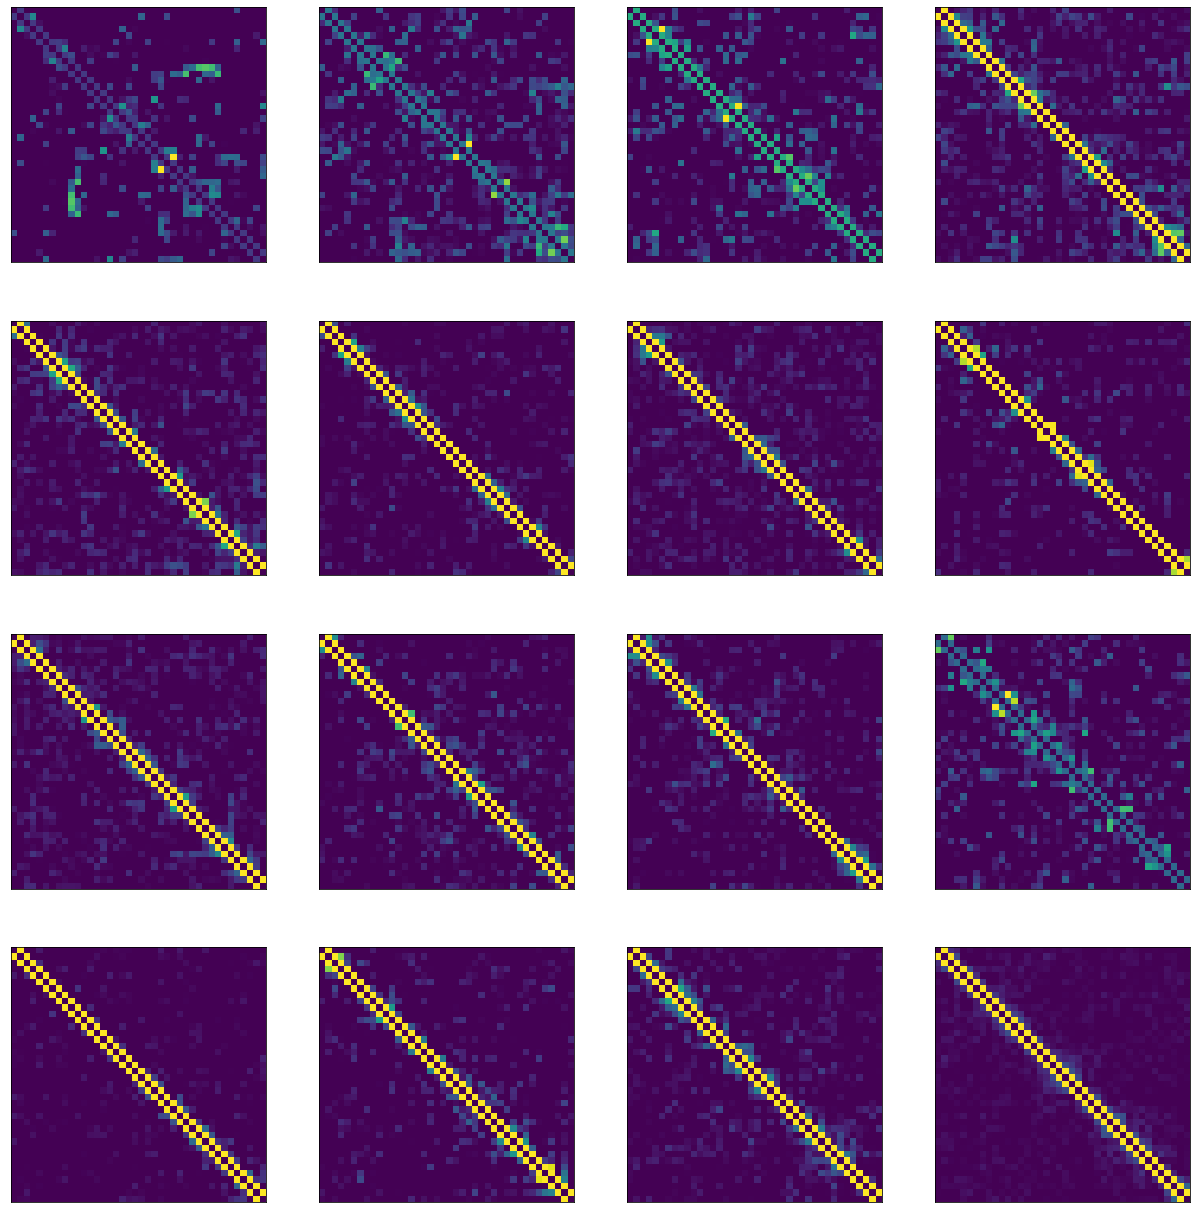

In [60]:
display_dictionary(W = W, figsize = [20,20])

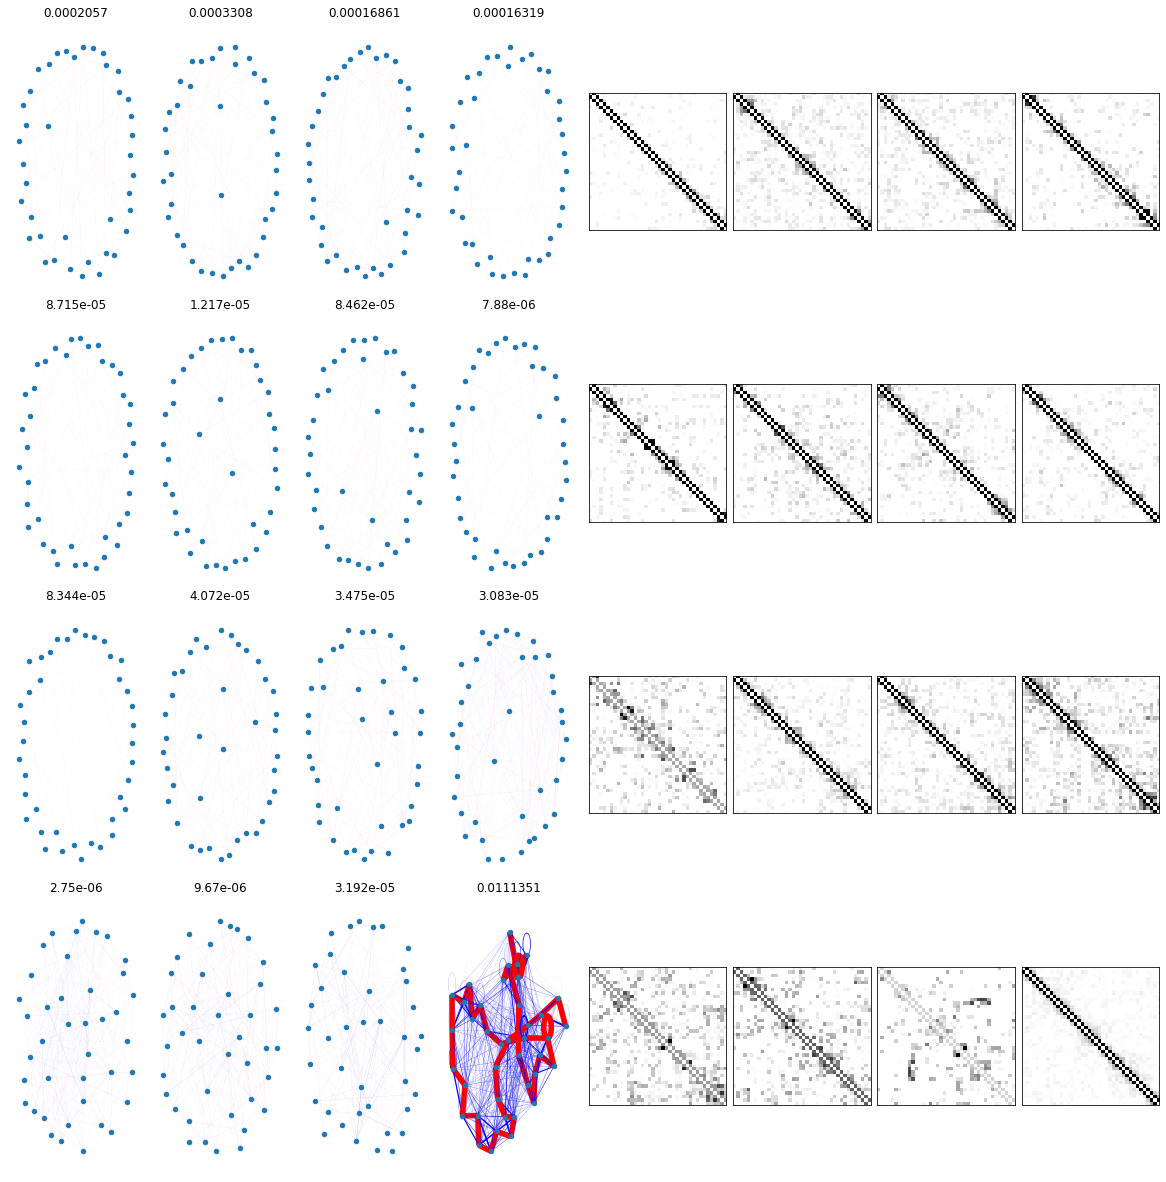

In [61]:
display_dict_and_graph(W = W, 
                       At = np.dot(H, H.T), 
                       regression_coeff = coeff, 
                       weight_graph = 50, 
                       fig_size = [20,20], 
                       show_importance = True)

## SDL_BCD - Filter-based

In [30]:
# SDL_BCD_filter
data_scale=10
results_dict_list20filter = []
iteration1 = 200
r = 16

# Cross-validation
xi_list = [0, 0.1, 1, 5, 10]
beta = 1
iter_avg = 2

for j in range(len(xi_list)):
    xi = xi_list[j]
    for i in range(iter_avg):
        data_scale=500
        SDL_BCD_class20filter = SDL_BCD(X = [X20_train.T/data_scale, Y20_train.T],
                                X_test = [X20_test.T/data_scale, Y20_test.T],
                                n_components = r,
                                xi = xi,
                                L1_reg = [0,0,0],
                                L2_reg = [0,0,0],
                                nonnegativity = [True,True,False],
                                full_dim = False)

        results_dict_new20filter = SDL_BCD_class20filter.fit(option = "filter",
                                             iter = iteration1, 
                                             subsample_size = None,
                                             beta = beta,
                                             update_nuance_param = False,
                                             if_compute_recons_error = True, 
                                             if_validate = False)

initial loading beta [[ 0.1374172  -0.56785661  0.19288807  0.98924533 -0.64252172  0.87998165
   0.56418296  0.37276485  0.19230896  0.80475491  0.67314499  0.43760708
  -0.7769861  -0.56730026 -0.53984755  0.47344117  0.51841543]]


  2%|▊                                          | 4/200 [00:00<00:05, 33.93it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.662]
--- Iteration 0: Training loss --- [Data, Label, Total] = [216.370744.3, 467.863051.3, 467.863051.3]


 10%|███▉                                      | 19/200 [00:00<00:03, 45.86it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.663]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.395288.3, 467.862988.3, 467.862988.3]


 14%|██████                                    | 29/200 [00:00<00:04, 42.60it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.668]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.142983.3, 467.862531.3, 467.862531.3]


 20%|████████▍                                 | 40/200 [00:00<00:03, 46.51it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.674]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.127678.3, 467.861564.3, 467.861564.3]


 22%|█████████▍                                | 45/200 [00:01<00:03, 41.52it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.682]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.126393.3, 467.860318.3, 467.860318.3]


 27%|███████████▎                              | 54/200 [00:01<00:04, 33.82it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.688]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.126979.3, 467.858956.3, 467.858956.3]


 34%|██████████████▎                           | 68/200 [00:01<00:03, 37.34it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.693]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.128248.3, 467.857671.3, 467.857671.3]


 38%|███████████████▉                          | 76/200 [00:01<00:03, 36.31it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.696]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.129704.3, 467.856522.3, 467.856522.3]


 44%|██████████████████▍                       | 88/200 [00:02<00:03, 37.22it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.698]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.131108.3, 467.855584.3, 467.855584.3]


 48%|████████████████████▏                     | 96/200 [00:02<00:02, 36.46it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.699]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.132345.3, 467.854871.3, 467.854871.3]


 55%|██████████████████████▎                  | 109/200 [00:02<00:02, 39.51it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.7]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.133387.3, 467.854353.3, 467.854353.3]


 59%|████████████████████████▏                | 118/200 [00:03<00:01, 41.82it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.701]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.134237.3, 467.853987.3, 467.853987.3]


 64%|██████████████████████████▍              | 129/200 [00:03<00:01, 42.94it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.134918.3, 467.853734.3, 467.853734.3]


 70%|████████████████████████████▍            | 139/200 [00:03<00:01, 42.28it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.135459.3, 467.853563.3, 467.853563.3]


 74%|██████████████████████████████▌          | 149/200 [00:03<00:01, 40.52it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.135887.3, 467.853449.3, 467.853449.3]


 80%|████████████████████████████████▌        | 159/200 [00:04<00:01, 40.88it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.136226.3, 467.853372.3, 467.853372.3]


 84%|██████████████████████████████████▋      | 169/200 [00:04<00:00, 43.94it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.136494.3, 467.853321.3, 467.853321.3]


 90%|████████████████████████████████████▋    | 179/200 [00:04<00:00, 44.78it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.136706.3, 467.853287.3, 467.853287.3]


 94%|██████████████████████████████████████▋  | 189/200 [00:04<00:00, 44.50it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.136876.3, 467.853265.3, 467.853265.3]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 40.24it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.137011.3, 467.853250.3, 467.853250.3]
!!! pred_type filter


initial loading beta [[-0.87237896  0.96747554 -0.68557432 -0.11775078 -0.83794779  0.23394392
  -0.94680973 -0.8252831   0.03691684  0.24764949 -0.47677876 -0.87436908
   0.8506745  -0.34972095 -0.90233378  0.80822305 -0.03204537]]


  2%|▊                                          | 4/200 [00:00<00:05, 35.48it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 0: Training loss --- [Data, Label, Total] = [215.110431.3, 467.862828.3, 467.862828.3]


 10%|███▉                                      | 19/200 [00:00<00:04, 42.87it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.661]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.393884.3, 467.862763.3, 467.862763.3]


 15%|██████▎                                   | 30/200 [00:00<00:03, 45.56it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.666]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.143291.3, 467.862284.3, 467.862284.3]


 20%|████████▌                                 | 41/200 [00:00<00:03, 46.94it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.673]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.127875.3, 467.861315.3, 467.861315.3]
--- Training --- [threshold, AUC] =  [0.502, 0.68]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.126625.3, 467.860067.3, 467.860067.3]


 28%|███████████▊                              | 56/200 [00:01<00:03, 47.31it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.687]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.127175.3, 467.858721.3, 467.858721.3]
--- Training --- [threshold, AUC] =  [0.502, 0.692]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.128347.3, 467.857471.3, 467.857471.3]


 40%|████████████████▌                         | 79/200 [00:01<00:02, 51.24it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.695]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.129714.3, 467.856360.3, 467.856360.3]
--- Training --- [threshold, AUC] =  [0.502, 0.697]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.131047.3, 467.855469.3, 467.855469.3]


 50%|████████████████████▌                    | 100/200 [00:02<00:02, 46.67it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.699]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.132247.3, 467.854794.3, 467.854794.3]


 56%|██████████████████████▊                  | 111/200 [00:02<00:01, 45.86it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.7]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.133277.3, 467.854303.3, 467.854303.3]
--- Training --- [threshold, AUC] =  [0.502, 0.701]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.134129.3, 467.853956.3, 467.853956.3]


 62%|█████████████████████████▋               | 125/200 [00:02<00:02, 36.01it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.701]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.134822.3, 467.853717.3, 467.853717.3]


 68%|████████████████████████████             | 137/200 [00:03<00:01, 32.78it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.135375.3, 467.853553.3, 467.853553.3]


 73%|█████████████████████████████▉           | 146/200 [00:03<00:01, 35.53it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.135815.3, 467.853443.3, 467.853443.3]


 78%|███████████████████████████████▉         | 156/200 [00:03<00:01, 39.20it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.136165.3, 467.853369.3, 467.853369.3]


 82%|█████████████████████████████████▊       | 165/200 [00:03<00:00, 36.80it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.136443.3, 467.853320.3, 467.853320.3]


 90%|████████████████████████████████████▋    | 179/200 [00:04<00:00, 41.48it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.136664.3, 467.853287.3, 467.853287.3]


 94%|██████████████████████████████████████▋  | 189/200 [00:04<00:00, 42.98it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.136840.3, 467.853264.3, 467.853264.3]


 97%|███████████████████████████████████████▊ | 194/200 [00:04<00:00, 39.78it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.702]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.136981.3, 467.853250.3, 467.853250.3]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 40.94it/s]


!!! pred_type filter
initial loading beta [[-0.15605262 -0.48497856 -0.9502906  -0.19301033 -0.38474713 -0.8207997
  -0.23882018 -0.15945079 -0.44390316  0.83012348 -0.09306065  0.91409748
   0.40148524  0.87628507 -0.80013452  0.5157286  -0.21472407]]


  2%|▊                                          | 4/200 [00:00<00:05, 33.95it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.661]
--- Iteration 0: Training loss --- [Data, Label, Total] = [222.487945.3, 467.863089.3, 490.111884.3]


  9%|███▊                                      | 18/200 [00:00<00:04, 43.21it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.662]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.456343.3, 467.863397.3, 467.909032.3]


 14%|█████▉                                    | 28/200 [00:00<00:03, 44.74it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.665]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.133466.3, 467.863238.3, 467.876584.3]


 16%|██████▉                                   | 33/200 [00:00<00:04, 39.16it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.668]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.083614.3, 467.862972.3, 467.871333.3]


 23%|█████████▋                                | 46/200 [00:01<00:04, 32.88it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.67]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.056058.3, 467.862679.3, 467.868285.3]


 29%|████████████▏                             | 58/200 [00:01<00:04, 34.53it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.673]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.043149.3, 467.862349.3, 467.866664.3]


 33%|█████████████▊                            | 66/200 [00:01<00:03, 35.90it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.675]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.038090.3, 467.862014.3, 467.865823.3]


 38%|███████████████▊                          | 75/200 [00:02<00:03, 34.58it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.677]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.035866.3, 467.861660.3, 467.865247.3]


 44%|██████████████████▋                       | 89/200 [00:02<00:02, 39.44it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.679]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.034754.3, 467.861293.3, 467.864768.3]


 50%|████████████████████▊                     | 99/200 [00:02<00:02, 41.96it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.681]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.034148.3, 467.860926.3, 467.864340.3]


 55%|██████████████████████▎                  | 109/200 [00:02<00:02, 43.29it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.684]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.033796.3, 467.860553.3, 467.863933.3]
--- Training --- [threshold, AUC] =  [0.502, 0.685]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.033578.3, 467.860182.3, 467.863539.3]


 65%|██████████████████████████▋              | 130/200 [00:03<00:01, 46.22it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.687]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.033432.3, 467.859814.3, 467.863157.3]
--- Training --- [threshold, AUC] =  [0.502, 0.689]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.033327.3, 467.859455.3, 467.862788.3]


 74%|██████████████████████████████▏          | 147/200 [00:03<00:01, 49.08it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.69]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.033248.3, 467.859106.3, 467.862431.3]
--- Training --- [threshold, AUC] =  [0.502, 0.691]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.033186.3, 467.858769.3, 467.862088.3]


 85%|██████████████████████████████████▊      | 170/200 [00:04<00:00, 51.34it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.692]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.033136.3, 467.858446.3, 467.861760.3]
--- Training --- [threshold, AUC] =  [0.502, 0.693]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.033094.3, 467.858137.3, 467.861447.3]


 94%|██████████████████████████████████████▌  | 188/200 [00:04<00:00, 51.08it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.693]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.033057.3, 467.857843.3, 467.861149.3]
--- Training --- [threshold, AUC] =  [0.502, 0.694]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.033025.3, 467.857590.3, 467.860893.3]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 42.08it/s]


!!! pred_type filter
initial loading beta [[-0.17856495 -0.80566087 -0.67677646 -0.45711838 -0.2556659  -0.51155264
   0.90780383  0.22021807  0.16365047 -0.78621511 -0.91551019 -0.42505677
  -0.01074516 -0.5926842  -0.48136166  0.07156505 -0.60272261]]


  2%|█                                          | 5/200 [00:00<00:04, 44.06it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 0: Training loss --- [Data, Label, Total] = [223.562199.3, 467.863134.3, 490.219354.3]


 10%|████▍                                     | 21/200 [00:00<00:03, 49.43it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.451215.3, 467.863443.3, 467.908564.3]
--- Training --- [threshold, AUC] =  [0.502, 0.662]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.133648.3, 467.863277.3, 467.876641.3]


 18%|███████▌                                  | 36/200 [00:00<00:04, 35.48it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.665]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.089175.3, 467.862942.3, 467.871860.3]


 24%|█████████▊                                | 47/200 [00:01<00:03, 41.32it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.669]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.060303.3, 467.862564.3, 467.868594.3]


 28%|███████████▊                              | 56/200 [00:01<00:04, 35.64it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.673]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.044895.3, 467.862138.3, 467.866628.3]


 32%|█████████████▋                            | 65/200 [00:01<00:03, 35.01it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.676]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.039135.3, 467.861686.3, 467.865600.3]


 40%|████████████████▊                         | 80/200 [00:02<00:02, 41.21it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.679]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.036764.3, 467.861204.3, 467.864881.3]


 42%|█████████████████▊                        | 85/200 [00:02<00:03, 30.95it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.682]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.035573.3, 467.860709.3, 467.864266.3]


 47%|███████████████████▋                      | 94/200 [00:02<00:03, 32.00it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.684]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.034880.3, 467.860219.3, 467.863707.3]


 54%|██████████████████████▏                  | 108/200 [00:02<00:02, 34.72it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.686]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.034438.3, 467.859732.3, 467.863176.3]


 58%|███████████████████████▉                 | 117/200 [00:03<00:02, 37.50it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.687]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.034135.3, 467.859260.3, 467.862673.3]


 62%|█████████████████████████▋               | 125/200 [00:03<00:02, 34.75it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.689]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.033916.3, 467.858808.3, 467.862200.3]


 68%|████████████████████████████             | 137/200 [00:03<00:01, 34.25it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.69]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.033752.3, 467.858381.3, 467.861757.3]


 74%|██████████████████████████████▏          | 147/200 [00:03<00:01, 40.20it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.691]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.033624.3, 467.857980.3, 467.861343.3]
--- Training --- [threshold, AUC] =  [0.502, 0.692]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.033521.3, 467.857633.3, 467.860985.3]


 84%|██████████████████████████████████▍      | 168/200 [00:04<00:00, 45.14it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.693]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.033435.3, 467.857287.3, 467.860631.3]


 90%|████████████████████████████████████▋    | 179/200 [00:04<00:00, 45.55it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.694]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.033363.3, 467.856968.3, 467.860304.3]


 94%|██████████████████████████████████████▋  | 189/200 [00:04<00:00, 46.43it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.695]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.033300.3, 467.856675.3, 467.860005.3]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 38.80it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.696]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.033244.3, 467.856406.3, 467.859731.3]
!!! pred_type filter


initial loading beta [[-0.7372294   0.60596418 -0.38226742 -0.27006161 -0.18556253 -0.85570883
  -0.51858147 -0.46013023  0.16674433 -0.28234879  0.56624648 -0.78216186
   0.858197   -0.00795931 -0.94566899  0.36569461 -0.09452322]]


  2%|█                                          | 5/200 [00:00<00:04, 41.79it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.662]
--- Iteration 0: Training loss --- [Data, Label, Total] = [278.537912.3, 467.864628.3, 746.402540.3]


 10%|████▍                                     | 21/200 [00:00<00:03, 47.69it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.589095.3, 467.865633.3, 468.454728.3]
--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.118141.3, 467.865607.3, 467.983748.3]


 18%|███████▊                                  | 37/200 [00:00<00:03, 47.28it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.066641.3, 467.865595.3, 467.932237.3]


 24%|██████████                                | 48/200 [00:01<00:03, 44.14it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.053025.3, 467.865587.3, 467.918613.3]


 29%|████████████▏                             | 58/200 [00:01<00:03, 43.10it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.047436.3, 467.865581.3, 467.913018.3]


 34%|██████████████▍                           | 69/200 [00:01<00:02, 45.15it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.044405.3, 467.865575.3, 467.909981.3]


 40%|████████████████▊                         | 80/200 [00:01<00:02, 46.78it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.042447.3, 467.865570.3, 467.908017.3]
--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.041020.3, 467.865564.3, 467.906584.3]


 50%|████████████████████▌                    | 100/200 [00:02<00:02, 46.94it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.039894.3, 467.865559.3, 467.905453.3]


 52%|█████████████████████▌                   | 105/200 [00:02<00:02, 44.41it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.038964.3, 467.865553.3, 467.904517.3]


 58%|███████████████████████▊                 | 116/200 [00:02<00:01, 45.47it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.038169.3, 467.865548.3, 467.903717.3]


 63%|█████████████████████████▊               | 126/200 [00:02<00:01, 45.09it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.037479.3, 467.865543.3, 467.903021.3]


 68%|███████████████████████████▉             | 136/200 [00:03<00:01, 45.29it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.036875.3, 467.865537.3, 467.902412.3]


 73%|█████████████████████████████▉           | 146/200 [00:03<00:01, 46.14it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.036344.3, 467.865532.3, 467.901876.3]


 78%|████████████████████████████████▏        | 157/200 [00:03<00:00, 47.44it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.035877.3, 467.865526.3, 467.901403.3]


 84%|██████████████████████████████████▏      | 167/200 [00:03<00:00, 44.74it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.035469.3, 467.865521.3, 467.900990.3]


 88%|████████████████████████████████████▎    | 177/200 [00:04<00:00, 38.22it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.664]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.035114.3, 467.865515.3, 467.900629.3]


 94%|██████████████████████████████████████▎  | 187/200 [00:04<00:00, 39.53it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.665]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.034805.3, 467.865509.3, 467.900314.3]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 44.03it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.665]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.034537.3, 467.865503.3, 467.900040.3]
!!! pred_type filter


initial loading beta [[-0.89528008 -0.92449158  0.83774729 -0.00295103 -0.21069411 -0.81705561
   0.8178993   0.53531878 -0.5464909  -0.71672595 -0.31457366  0.88171019
  -0.92085641  0.10920282 -0.67825336  0.28724241 -0.97414658]]


  2%|█                                          | 5/200 [00:00<00:04, 42.14it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.668]
--- Iteration 0: Training loss --- [Data, Label, Total] = [287.387265.3, 467.864691.3, 755.251956.3]


 10%|████▍                                     | 21/200 [00:00<00:03, 46.85it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.659]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.473995.3, 467.865693.3, 468.339688.3]
--- Training --- [threshold, AUC] =  [0.502, 0.659]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.092493.3, 467.865669.3, 467.958162.3]


 18%|███████▌                                  | 36/200 [00:00<00:03, 46.64it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.659]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.060428.3, 467.865657.3, 467.926085.3]


 23%|█████████▋                                | 46/200 [00:01<00:03, 44.82it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.659]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.051108.3, 467.865648.3, 467.916757.3]


 28%|███████████▉                              | 57/200 [00:01<00:03, 45.30it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.659]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.046699.3, 467.865641.3, 467.912339.3]


 34%|██████████████▎                           | 68/200 [00:01<00:02, 45.54it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.659]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.044079.3, 467.865634.3, 467.909713.3]


 39%|████████████████▍                         | 78/200 [00:01<00:02, 45.00it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.659]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.042303.3, 467.865628.3, 467.907931.3]


 44%|██████████████████▋                       | 89/200 [00:01<00:02, 46.86it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.659]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.040987.3, 467.865622.3, 467.906609.3]


 50%|████████████████████▊                     | 99/200 [00:02<00:02, 46.20it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.659]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.039956.3, 467.865615.3, 467.905571.3]


 55%|██████████████████████▎                  | 109/200 [00:02<00:01, 47.48it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.039114.3, 467.865609.3, 467.904723.3]


 60%|████████████████████████▍                | 119/200 [00:02<00:01, 47.12it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.038407.3, 467.865603.3, 467.904010.3]


 65%|██████████████████████████▋              | 130/200 [00:02<00:01, 48.25it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.037802.3, 467.865597.3, 467.903399.3]


 70%|████████████████████████████▉            | 141/200 [00:03<00:01, 47.14it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.037279.3, 467.865591.3, 467.902870.3]
--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.036823.3, 467.865585.3, 467.902407.3]


 78%|████████████████████████████████▏        | 157/200 [00:03<00:00, 47.61it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.036423.3, 467.865578.3, 467.902001.3]


 84%|██████████████████████████████████▏      | 167/200 [00:03<00:00, 46.20it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.036072.3, 467.865572.3, 467.901644.3]


 88%|████████████████████████████████████▎    | 177/200 [00:03<00:00, 44.39it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.035762.3, 467.865565.3, 467.901328.3]


 94%|██████████████████████████████████████▌  | 188/200 [00:04<00:00, 46.14it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.035488.3, 467.865559.3, 467.901047.3]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 45.52it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.66]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.035244.3, 467.865552.3, 467.900797.3]


!!! pred_type filter
initial loading beta [[ 0.93140995 -0.63122547 -0.18642269 -0.64815562 -0.93623204  0.76803066
   0.19381181 -0.3444968   0.9157783  -0.7825143  -0.68435255 -0.47625339
  -0.24530829 -0.2232527   0.88558131  0.63275121 -0.98210142]]


  2%|█                                          | 5/200 [00:00<00:04, 46.05it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.666]
--- Iteration 0: Training loss --- [Data, Label, Total] = [252.468595.3, 467.866683.3, 1730.209658.3]


 10%|████▏                                     | 20/200 [00:00<00:03, 47.02it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.637]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.435228.3, 467.866956.3, 470.043096.3]


 15%|██████▎                                   | 30/200 [00:00<00:03, 46.19it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.080104.3, 467.866952.3, 468.267471.3]


 20%|████████▍                                 | 40/200 [00:00<00:03, 44.63it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.049261.3, 467.866951.3, 468.113254.3]


 22%|█████████▍                                | 45/200 [00:01<00:03, 39.13it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.041097.3, 467.866950.3, 468.072436.3]


 30%|████████████▊                             | 61/200 [00:01<00:03, 45.27it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.038266.3, 467.866950.3, 468.058281.3]
--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.037130.3, 467.866949.3, 468.052597.3]


 38%|███████████████▉                          | 76/200 [00:01<00:03, 41.23it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.036600.3, 467.866949.3, 468.049951.3]


 44%|██████████████████▍                       | 88/200 [00:01<00:02, 47.60it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.036308.3, 467.866948.3, 468.048487.3]
--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.036120.3, 467.866948.3, 468.047546.3]


 56%|██████████████████████▊                  | 111/200 [00:02<00:01, 52.01it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.035986.3, 467.866948.3, 468.046879.3]
--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.035886.3, 467.866947.3, 468.046379.3]


 64%|██████████████████████████▍              | 129/200 [00:02<00:01, 51.85it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.035808.3, 467.866947.3, 468.045988.3]


 70%|████████████████████████████▋            | 140/200 [00:03<00:01, 48.45it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.035745.3, 467.866946.3, 468.045670.3]


 75%|██████████████████████████████▊          | 150/200 [00:03<00:01, 45.17it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.035692.3, 467.866946.3, 468.045405.3]


 78%|███████████████████████████████▊         | 155/200 [00:03<00:01, 44.65it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.035646.3, 467.866946.3, 468.045176.3]


 83%|██████████████████████████████████       | 166/200 [00:03<00:00, 45.37it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.035606.3, 467.866945.3, 468.044974.3]


 88%|████████████████████████████████████▎    | 177/200 [00:03<00:00, 47.78it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.035569.3, 467.866945.3, 468.044791.3]


 94%|██████████████████████████████████████▌  | 188/200 [00:04<00:00, 48.38it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.035535.3, 467.866944.3, 468.044620.3]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 46.20it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.035503.3, 467.866944.3, 468.044459.3]
!!! pred_type filter


initial loading beta [[ 0.17617646  0.76918941 -0.59725979  0.64267397  0.40397557 -0.40995986
   0.21131075  0.81364297 -0.715805    0.84305278  0.61641402  0.35581116
   0.23387067 -0.60537753  0.29393076  0.91230107 -0.35812214]]


  2%|█                                          | 5/200 [00:00<00:04, 41.71it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.667]
--- Iteration 0: Training loss --- [Data, Label, Total] = [264.276438.3, 467.866690.3, 1789.248879.3]


 10%|████▍                                     | 21/200 [00:00<00:03, 49.88it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.626]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.597837.3, 467.867083.3, 470.856268.3]
--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.048983.3, 467.867076.3, 468.111992.3]


 18%|███████▊                                  | 37/200 [00:00<00:03, 48.12it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.037929.3, 467.867076.3, 468.056723.3]


 24%|██████████                                | 48/200 [00:01<00:03, 47.70it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.036563.3, 467.867075.3, 468.049889.3]


 30%|████████████▍                             | 59/200 [00:01<00:02, 47.54it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.036232.3, 467.867075.3, 468.048234.3]


 34%|██████████████▍                           | 69/200 [00:01<00:03, 43.06it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.036134.3, 467.867074.3, 468.047742.3]


 40%|████████████████▌                         | 79/200 [00:01<00:02, 43.36it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.036090.3, 467.867074.3, 468.047526.3]


 44%|██████████████████▋                       | 89/200 [00:01<00:02, 43.96it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.036062.3, 467.867073.3, 468.047381.3]


 50%|████████████████████▌                    | 100/200 [00:02<00:02, 44.78it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.036036.3, 467.867073.3, 468.047255.3]


 55%|██████████████████████▌                  | 110/200 [00:02<00:01, 45.40it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.036012.3, 467.867072.3, 468.047134.3]


 60%|████████████████████████▊                | 121/200 [00:02<00:01, 47.67it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.035989.3, 467.867072.3, 468.047016.3]
--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.035966.3, 467.867071.3, 468.046899.3]


 68%|███████████████████████████▉             | 136/200 [00:02<00:01, 47.27it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.035942.3, 467.867071.3, 468.046783.3]


 73%|█████████████████████████████▉           | 146/200 [00:03<00:01, 46.57it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.035919.3, 467.867070.3, 468.046667.3]


 78%|████████████████████████████████▏        | 157/200 [00:03<00:00, 49.75it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.035896.3, 467.867070.3, 468.046552.3]
--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.035874.3, 467.867069.3, 468.046438.3]


 89%|████████████████████████████████████▍    | 178/200 [00:03<00:00, 47.69it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.035851.3, 467.867069.3, 468.046324.3]


 94%|██████████████████████████████████████▋  | 189/200 [00:04<00:00, 48.72it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.035828.3, 467.867069.3, 468.046211.3]
--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.035806.3, 467.867068.3, 468.046098.3]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 46.01it/s]


!!! pred_type filter
initial loading beta [[ 0.88812697  0.1715091  -0.63285403  0.32181217 -0.84508805  0.70188219
   0.41030189 -0.61696874  0.52224925  0.19737201  0.79027913 -0.86297332
   0.11999876 -0.43604268 -0.68618232 -0.57516973 -0.7074523 ]]


  2%|█                                          | 5/200 [00:00<00:03, 48.93it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.65]
--- Iteration 0: Training loss --- [Data, Label, Total] = [82.933998.3, 467.867552.3, 1297.207534.3]


  8%|███▏                                      | 15/200 [00:00<00:04, 44.94it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.621]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.137355.3, 467.867512.3, 469.241061.3]


 15%|██████▎                                   | 30/200 [00:00<00:03, 45.68it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.625]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.138847.3, 467.867512.3, 469.255981.3]


 20%|████████▍                                 | 40/200 [00:00<00:03, 46.19it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.629]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.138851.3, 467.867512.3, 469.256022.3]


 25%|██████████▌                               | 50/200 [00:01<00:03, 45.35it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.631]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.138848.3, 467.867512.3, 469.255997.3]


 30%|████████████▊                             | 61/200 [00:01<00:02, 47.46it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.634]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.138844.3, 467.867512.3, 469.255954.3]
--- Training --- [threshold, AUC] =  [0.502, 0.636]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.138839.3, 467.867512.3, 469.255902.3]


 39%|████████████████▍                         | 78/200 [00:01<00:02, 49.84it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.638]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.138833.3, 467.867512.3, 469.255847.3]


 44%|██████████████████▋                       | 89/200 [00:01<00:02, 50.51it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.639]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.138828.3, 467.867512.3, 469.255790.3]
--- Training --- [threshold, AUC] =  [0.502, 0.641]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.138822.3, 467.867512.3, 469.255732.3]


 54%|█████████████████████▉                   | 107/200 [00:02<00:01, 49.59it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.642]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.138816.3, 467.867512.3, 469.255674.3]
--- Training --- [threshold, AUC] =  [0.502, 0.642]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.138810.3, 467.867512.3, 469.255616.3]


 64%|██████████████████████████▍              | 129/200 [00:02<00:01, 50.74it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.643]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.138805.3, 467.867512.3, 469.255557.3]


 70%|████████████████████████████▉            | 141/200 [00:02<00:01, 48.99it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.644]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.138798.3, 467.867512.3, 469.255491.3]
--- Training --- [threshold, AUC] =  [0.502, 0.644]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.138791.3, 467.867511.3, 469.255421.3]


 78%|████████████████████████████████▏        | 157/200 [00:03<00:00, 46.27it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.645]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.138785.3, 467.867511.3, 469.255359.3]


 84%|██████████████████████████████████▋      | 169/200 [00:03<00:00, 49.06it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.645]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.138777.3, 467.867511.3, 469.255281.3]
--- Training --- [threshold, AUC] =  [0.502, 0.646]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.138771.3, 467.867511.3, 469.255225.3]


 94%|██████████████████████████████████████▋  | 189/200 [00:04<00:00, 46.20it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.646]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.138765.3, 467.867511.3, 469.255160.3]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 47.04it/s]


--- Training --- [threshold, AUC] =  [0.502, 0.646]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.138758.3, 467.867511.3, 469.255088.3]
!!! pred_type filter
initial loading beta [[ 0.03941905 -0.41296303  0.2939042  -0.81579985 -0.88506082 -0.12065125
  -0.6728319   0.20692216 -0.54434037  0.64813262 -0.55420817  0.43443303
   0.99616192 -0.68002999  0.70480052 -0.1065194  -0.38823172]]


  3%|█▎                                         | 6/200 [00:00<00:03, 52.21it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.567]
--- Iteration 0: Training loss --- [Data, Label, Total] = [100.419475.3, 467.867666.3, 1472.062417.3]
--- Training --- [threshold, AUC] =  [0.502, 0.579]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.415071.3, 467.867666.3, 472.018377.3]


 15%|██████▎                                   | 30/200 [00:00<00:03, 54.62it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.577]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.185692.3, 467.867666.3, 469.724586.3]
--- Training --- [threshold, AUC] =  [0.502, 0.578]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.153793.3, 467.867666.3, 469.405594.3]


 24%|██████████                                | 48/200 [00:00<00:02, 52.27it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.579]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.144497.3, 467.867666.3, 469.312639.3]
--- Training --- [threshold, AUC] =  [0.502, 0.579]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.141242.3, 467.867666.3, 469.280082.3]


 35%|██████████████▋                           | 70/200 [00:01<00:02, 50.60it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.58]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.140024.3, 467.867666.3, 469.267902.3]


 38%|███████████████▉                          | 76/200 [00:01<00:02, 48.83it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.58]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.139553.3, 467.867666.3, 469.263200.3]


 43%|██████████████████                        | 86/200 [00:01<00:02, 47.80it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.581]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.139367.3, 467.867666.3, 469.261337.3]


 48%|████████████████████▎                     | 97/200 [00:01<00:02, 49.02it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.581]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.139289.3, 467.867666.3, 469.260553.3]
--- Training --- [threshold, AUC] =  [0.502, 0.581]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.139255.3, 467.867666.3, 469.260219.3]


 60%|████████████████████████▍                | 119/200 [00:02<00:01, 51.81it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.582]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.139239.3, 467.867666.3, 469.260052.3]
--- Training --- [threshold, AUC] =  [0.502, 0.582]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.139228.3, 467.867666.3, 469.259948.3]


 68%|████████████████████████████             | 137/200 [00:02<00:01, 52.20it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.582]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.139220.3, 467.867666.3, 469.259868.3]
--- Training --- [threshold, AUC] =  [0.502, 0.583]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.139213.3, 467.867666.3, 469.259797.3]


 80%|████████████████████████████████▊        | 160/200 [00:03<00:00, 51.55it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.583]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.139206.3, 467.867666.3, 469.259729.3]
--- Training --- [threshold, AUC] =  [0.502, 0.583]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.139200.3, 467.867666.3, 469.259661.3]


 89%|████████████████████████████████████▍    | 178/200 [00:03<00:00, 50.10it/s]

--- Training --- [threshold, AUC] =  [0.502, 0.584]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.139193.3, 467.867666.3, 469.259594.3]
--- Training --- [threshold, AUC] =  [0.502, 0.584]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.139186.3, 467.867666.3, 469.259526.3]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 49.97it/s]


--- Training --- [threshold, AUC] =  [0.502, 0.585]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.139179.3, 467.867666.3, 469.259457.3]
!!! pred_type filter


In [31]:
W = results_dict_new20filter['loading'][0]
coeff = results_dict_new20filter['loading'][1][0]
H = results_dict_new20filter['code']

In [32]:
print('Accuracy: {}'.format(results_dict_new20filter['Accuracy']))
print('Training RRE: {}'.format(results_dict_new20filter['Relative_reconstruction_loss (training)']))
print('Testing RRE: {}'.format(results_dict_new20filter['Relative_reconstruction_loss (test)']))

Accuracy: 0.5333333333333333
Training RRE: 0.9928878574104573
Testing RRE: 0.6401466554731432


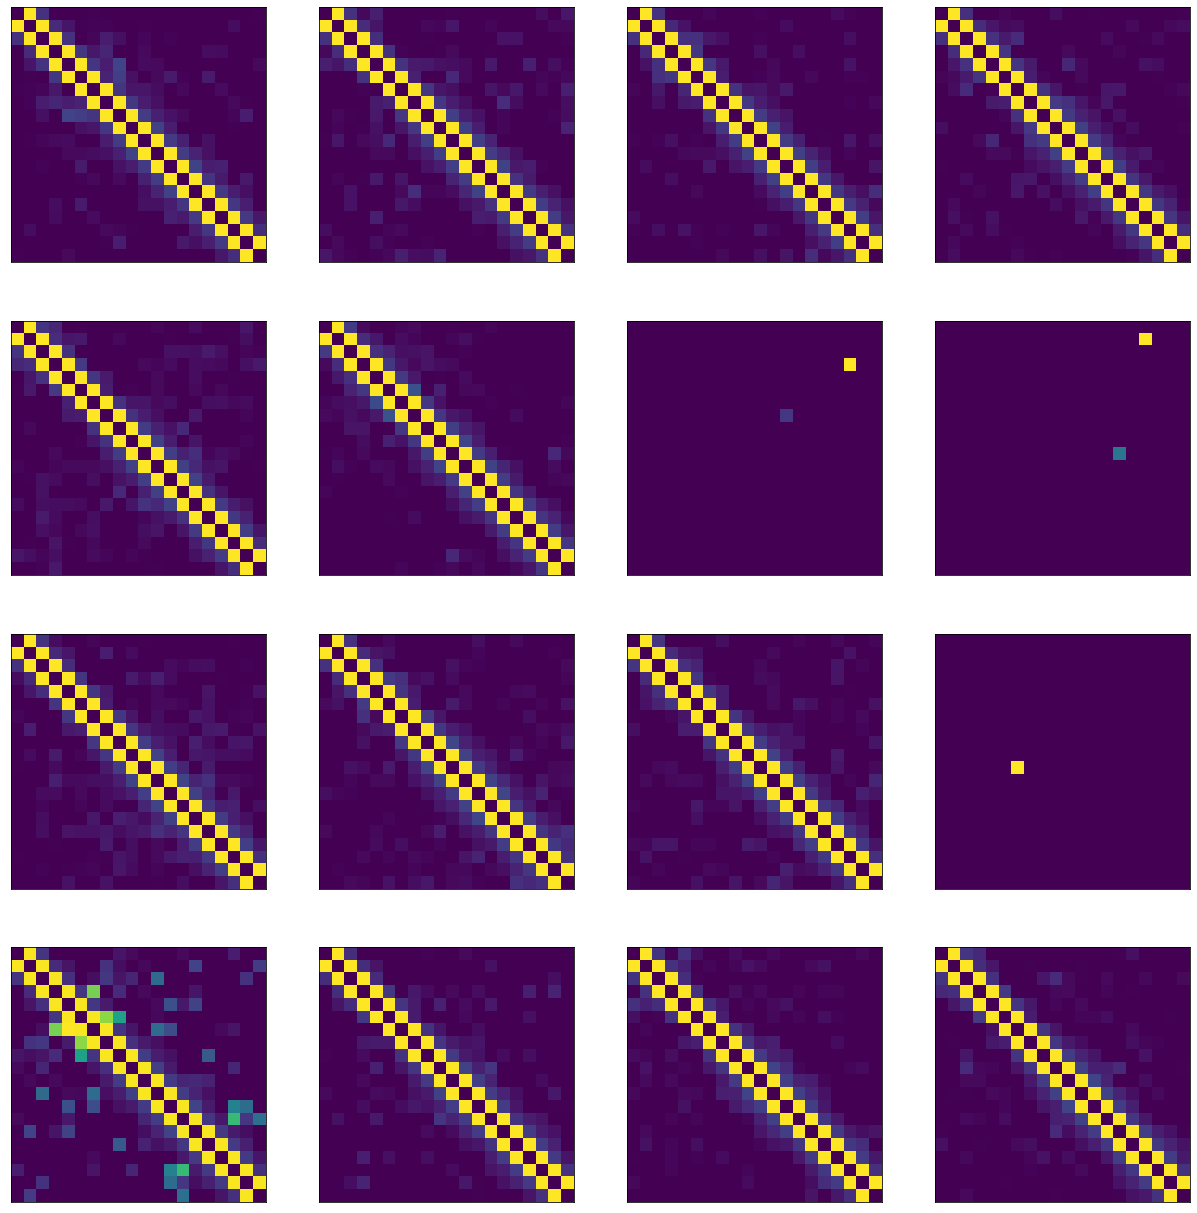

In [33]:
display_dictionary(W = W, figsize = [20,20])

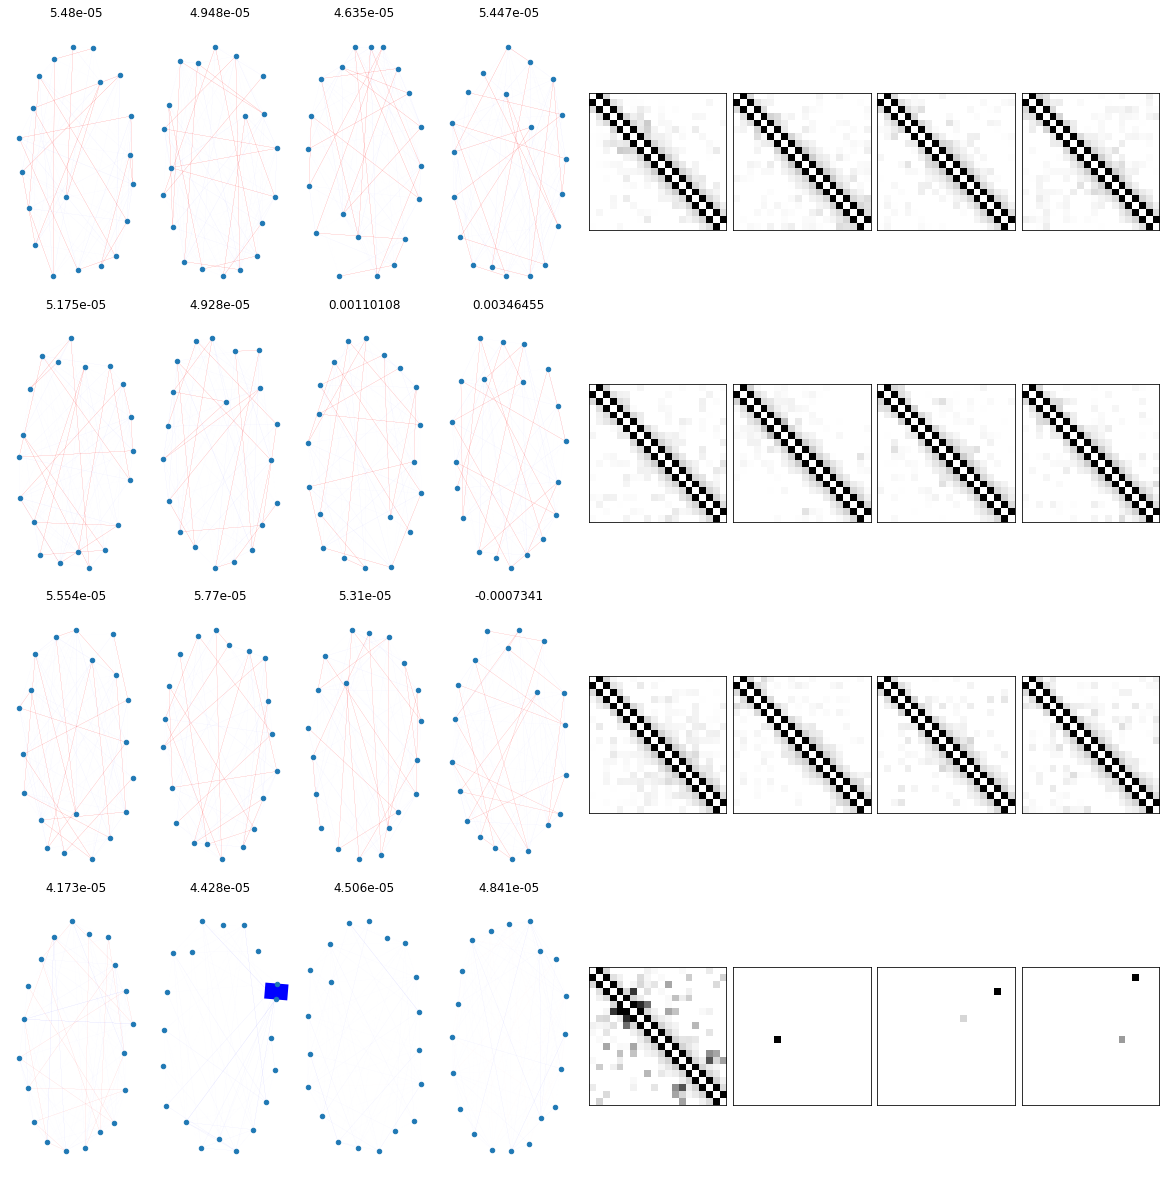

In [35]:
display_dict_and_graph(W = W, 
                       At = np.dot(H, H.T), 
                       regression_coeff = coeff, 
                       weight_graph = 150, 
                       fig_size = [20,20], 
                       show_importance = True)

In [36]:
# SDL_BCD_filter
data_scale=10
results_dict_list40filter = []
iteration1 = 200
r = 16

# Cross-validation
xi_list = [0, 0.1, 1, 5, 10]
beta = 1
iter_avg = 2

for j in range(len(xi_list)):
    xi = xi_list[j]
    for i in range(iter_avg):
        data_scale=500
        SDL_BCD_class40filter = SDL_BCD(X = [X40_train.T/data_scale, Y40_train.T],
                                X_test = [X40_test.T/data_scale, Y40_test.T],
                                n_components = r,
                                xi = xi,
                                L1_reg = [0,0,0],
                                L2_reg = [0,0,0],
                                nonnegativity = [True,True,False],
                                full_dim = False)

        results_dict_new40filter = SDL_BCD_class40filter.fit(option = "filter",
                                             iter = iteration1, 
                                             subsample_size = None,
                                             beta = beta,
                                             update_nuance_param = False,
                                             if_compute_recons_error = True, 
                                             if_validate = False)

initial loading beta [[ 0.15795001 -0.32315582  0.26845282  0.5659314   0.4721701   0.30550199
   0.3656877   0.48040967 -0.2747796  -0.32457964  0.8153434  -0.43473107
  -0.70745767 -0.27735165 -0.78941506 -0.19380674 -0.11037778]]


  0%|▏                                          | 1/200 [00:00<00:21,  9.36it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.699]
--- Iteration 0: Training loss --- [Data, Label, Total] = [212.893991.3, 465.286707.3, 465.286707.3]


  6%|██▋                                       | 13/200 [00:00<00:11, 16.42it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.701]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.578422.3, 465.286491.3, 465.286491.3]


 12%|████▊                                     | 23/200 [00:01<00:12, 14.02it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.718]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.319982.3, 465.284845.3, 465.284845.3]


 16%|██████▉                                   | 33/200 [00:02<00:11, 15.16it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.749]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.305152.3, 465.280835.3, 465.280835.3]


 22%|█████████                                 | 43/200 [00:02<00:09, 16.24it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.778]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.305815.3, 465.275262.3, 465.275262.3]


 26%|███████████▏                              | 53/200 [00:03<00:09, 16.07it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.795]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.308576.3, 465.269936.3, 465.269936.3]


 32%|█████████████▏                            | 63/200 [00:04<00:10, 13.40it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.802]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.311271.3, 465.266264.3, 465.266264.3]


 36%|███████████████▎                          | 73/200 [00:05<00:12, 10.31it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.313250.3, 465.264292.3, 465.264292.3]


 42%|█████████████████▍                        | 83/200 [00:06<00:11, 10.14it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.314539.3, 465.263386.3, 465.263386.3]


 46%|███████████████████▌                      | 93/200 [00:07<00:10, 10.36it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.315357.3, 465.262988.3, 465.262988.3]


 51%|████████████████████▉                    | 102/200 [00:08<00:09, 10.04it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.315875.3, 465.262817.3, 465.262817.3]


 56%|███████████████████████▏                 | 113/200 [00:09<00:06, 13.45it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.316206.3, 465.262742.3, 465.262742.3]


 60%|████████████████████████▊                | 121/200 [00:09<00:05, 13.57it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.316420.3, 465.262709.3, 465.262709.3]


 66%|███████████████████████████▎             | 133/200 [00:10<00:04, 15.85it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.316559.3, 465.262695.3, 465.262695.3]


 72%|█████████████████████████████▎           | 143/200 [00:11<00:03, 17.00it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.316650.3, 465.262688.3, 465.262688.3]


 76%|███████████████████████████████▎         | 153/200 [00:11<00:02, 18.57it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.316710.3, 465.262686.3, 465.262686.3]


 82%|█████████████████████████████████▍       | 163/200 [00:12<00:02, 18.20it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.316749.3, 465.262684.3, 465.262684.3]


 86%|███████████████████████████████████▍     | 173/200 [00:12<00:01, 13.59it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.316775.3, 465.262684.3, 465.262684.3]


 92%|█████████████████████████████████████▌   | 183/200 [00:13<00:01, 12.36it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.316793.3, 465.262684.3, 465.262684.3]


 96%|███████████████████████████████████████▌ | 193/200 [00:14<00:00, 13.33it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.316804.3, 465.262684.3, 465.262684.3]


100%|█████████████████████████████████████████| 200/200 [00:15<00:00, 13.26it/s]


!!! pred_type filter
initial loading beta [[ 0.44680091 -0.1435473   0.22595074 -0.53390251  0.81459669  0.77030477
  -0.17984724  0.31924657  0.79562653  0.62920358 -0.45505159 -0.94045131
  -0.3236264  -0.55398664 -0.91146393 -0.60723676 -0.38595061]]


  0%|▏                                          | 1/200 [00:00<00:21,  9.33it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.697]
--- Iteration 0: Training loss --- [Data, Label, Total] = [212.879815.3, 465.286691.3, 465.286691.3]


  6%|██▋                                       | 13/200 [00:00<00:11, 16.41it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.7]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.569089.3, 465.286467.3, 465.286467.3]


 12%|████▊                                     | 23/200 [00:01<00:10, 16.16it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.718]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.319575.3, 465.284750.3, 465.284750.3]


 16%|██████▉                                   | 33/200 [00:02<00:09, 17.81it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.75]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.305628.3, 465.280596.3, 465.280596.3]


 22%|█████████                                 | 43/200 [00:02<00:10, 15.65it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.778]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.306418.3, 465.274917.3, 465.274917.3]


 26%|███████████▏                              | 53/200 [00:03<00:08, 17.54it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.795]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.309109.3, 465.269641.3, 465.269641.3]


 32%|█████████████▏                            | 63/200 [00:03<00:07, 17.77it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.803]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.311646.3, 465.266091.3, 465.266091.3]


 37%|███████████████▌                          | 74/200 [00:04<00:06, 18.58it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.313492.3, 465.264211.3, 465.264211.3]


 42%|█████████████████▋                        | 84/200 [00:05<00:06, 18.55it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.806]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.314691.3, 465.263350.3, 465.263350.3]


 47%|███████████████████▋                      | 94/200 [00:05<00:06, 17.17it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.315452.3, 465.262973.3, 465.262973.3]


 52%|█████████████████████                    | 103/200 [00:06<00:05, 18.24it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.315936.3, 465.262809.3, 465.262809.3]


 56%|███████████████████████▏                 | 113/200 [00:06<00:05, 16.28it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.316246.3, 465.262738.3, 465.262738.3]


 62%|█████████████████████████▏               | 123/200 [00:07<00:04, 16.68it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.316446.3, 465.262707.3, 465.262707.3]


 66%|███████████████████████████▎             | 133/200 [00:07<00:03, 18.06it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.805]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.316576.3, 465.262694.3, 465.262694.3]


 72%|█████████████████████████████▌           | 144/200 [00:08<00:03, 18.03it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.316661.3, 465.262688.3, 465.262688.3]


 76%|███████████████████████████████▏         | 152/200 [00:09<00:03, 14.82it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.316717.3, 465.262686.3, 465.262686.3]


 82%|█████████████████████████████████▌       | 164/200 [00:09<00:02, 15.15it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.316754.3, 465.262684.3, 465.262684.3]


 87%|███████████████████████████████████▋     | 174/200 [00:10<00:01, 16.07it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.316779.3, 465.262684.3, 465.262684.3]


 92%|█████████████████████████████████████▋   | 184/200 [00:11<00:00, 17.25it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.316795.3, 465.262684.3, 465.262684.3]


 97%|███████████████████████████████████████▊ | 194/200 [00:11<00:00, 17.68it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.804]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.316806.3, 465.262684.3, 465.262684.3]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 16.82it/s]


!!! pred_type filter
initial loading beta [[-0.78644982  0.83563244 -0.82790858  0.26948464 -0.08203466  0.00560971
  -0.33727687  0.34807896 -0.30295707 -0.43811981  0.7084352   0.93182626
   0.67238997 -0.17390584  0.89002286 -0.40460167  0.91534906]]


  1%|▍                                          | 2/200 [00:00<00:12, 16.46it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.697]
--- Iteration 0: Training loss --- [Data, Label, Total] = [225.885776.3, 465.287201.3, 487.875778.3]


  7%|██▉                                       | 14/200 [00:00<00:10, 18.17it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.697]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.596119.3, 465.287520.3, 465.347132.3]


 12%|████▊                                     | 23/200 [00:01<00:09, 18.65it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.706]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.272051.3, 465.286866.3, 465.314071.3]


 16%|██████▉                                   | 33/200 [00:01<00:08, 18.63it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.721]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.178423.3, 465.285751.3, 465.303593.3]


 22%|█████████                                 | 43/200 [00:02<00:08, 17.98it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.735]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.122965.3, 465.284498.3, 465.296795.3]


 27%|███████████▎                              | 54/200 [00:02<00:08, 17.97it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.747]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.107678.3, 465.283079.3, 465.293847.3]


 32%|█████████████▍                            | 64/200 [00:03<00:08, 16.73it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.758]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.103654.3, 465.281539.3, 465.291905.3]


 38%|███████████████▊                          | 75/200 [00:04<00:06, 18.03it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.767]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.102272.3, 465.279943.3, 465.290170.3]


 42%|█████████████████▍                        | 83/200 [00:04<00:06, 18.33it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.775]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.101687.3, 465.278353.3, 465.288521.3]


 47%|███████████████████▋                      | 94/200 [00:05<00:05, 18.32it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.78]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.101403.3, 465.276835.3, 465.286976.3]


 51%|████████████████████▉                    | 102/200 [00:05<00:07, 13.71it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.786]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.101252.3, 465.275386.3, 465.285511.3]


 56%|███████████████████████▏                 | 113/200 [00:06<00:05, 17.29it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.789]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.101165.3, 465.274037.3, 465.284154.3]


 62%|█████████████████████████▏               | 123/200 [00:07<00:04, 15.45it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.792]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.101112.3, 465.272806.3, 465.282917.3]


 66%|███████████████████████████              | 132/200 [00:07<00:04, 14.96it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.795]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.101078.3, 465.271698.3, 465.281806.3]


 72%|█████████████████████████████▌           | 144/200 [00:08<00:03, 16.83it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.797]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.101054.3, 465.270713.3, 465.280819.3]


 76%|███████████████████████████████▏         | 152/200 [00:08<00:03, 14.70it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.799]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.101035.3, 465.269846.3, 465.279950.3]


 81%|█████████████████████████████████▏       | 162/200 [00:09<00:02, 13.19it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.8]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.101020.3, 465.269086.3, 465.279188.3]


 86%|███████████████████████████████████▎     | 172/200 [00:10<00:02, 12.79it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.801]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.101005.3, 465.268423.3, 465.278523.3]


 91%|█████████████████████████████████████▎   | 182/200 [00:11<00:01, 13.24it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.801]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.100991.3, 465.267842.3, 465.277942.3]


 97%|███████████████████████████████████████▊ | 194/200 [00:11<00:00, 16.21it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.802]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.100976.3, 465.267334.3, 465.277432.3]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.34it/s]


!!! pred_type filter
initial loading beta [[ 0.37383752  0.16949085  0.96433719  0.08738345 -0.27907515  0.90444418
   0.88495879 -0.47948466 -0.42616627 -0.9847387  -0.91310076 -0.86449361
  -0.13071459  0.45123165 -0.63595895 -0.47895402  0.19648926]]


  0%|▏                                          | 1/200 [00:00<00:21,  9.22it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.697]
--- Iteration 0: Training loss --- [Data, Label, Total] = [222.332512.3, 465.287092.3, 487.520344.3]


  6%|██▋                                       | 13/200 [00:00<00:10, 18.32it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.697]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.633785.3, 465.287361.3, 465.350740.3]


 12%|████▊                                     | 23/200 [00:01<00:10, 17.47it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.705]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.272599.3, 465.286771.3, 465.314031.3]


 17%|███████▏                                  | 34/200 [00:01<00:08, 18.74it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.718]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.175308.3, 465.285791.3, 465.303322.3]


 22%|█████████                                 | 43/200 [00:02<00:08, 18.67it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.73]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.120995.3, 465.284704.3, 465.296804.3]


 26%|███████████▏                              | 53/200 [00:03<00:08, 16.86it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.741]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.106720.3, 465.283487.3, 465.294159.3]


 32%|█████████████▏                            | 63/200 [00:03<00:09, 13.96it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.75]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.103197.3, 465.282163.3, 465.292483.3]


 36%|███████████████▎                          | 73/200 [00:04<00:09, 12.91it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.759]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.102025.3, 465.280778.3, 465.290980.3]


 42%|█████████████████▍                        | 83/200 [00:05<00:07, 16.67it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.767]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.101524.3, 465.279374.3, 465.289527.3]


 46%|███████████████████▌                      | 93/200 [00:05<00:06, 16.49it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.773]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.101272.3, 465.278001.3, 465.288128.3]


 52%|█████████████████████                    | 103/200 [00:06<00:05, 17.37it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.779]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.101131.3, 465.276665.3, 465.286778.3]


 57%|███████████████████████▎                 | 114/200 [00:06<00:04, 17.90it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.783]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.101048.3, 465.275396.3, 465.285501.3]


 62%|█████████████████████████▍               | 124/200 [00:07<00:04, 18.27it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.787]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.100997.3, 465.274201.3, 465.284301.3]


 67%|███████████████████████████▍             | 134/200 [00:08<00:03, 18.05it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.79]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.100965.3, 465.273092.3, 465.283188.3]


 72%|█████████████████████████████▌           | 144/200 [00:08<00:03, 17.65it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.793]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.100944.3, 465.272074.3, 465.282169.3]


 77%|███████████████████████████████▌         | 154/200 [00:09<00:02, 17.82it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.795]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.100930.3, 465.271151.3, 465.281244.3]


 82%|█████████████████████████████████▌       | 164/200 [00:09<00:01, 18.05it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.797]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.100920.3, 465.270322.3, 465.280414.3]


 87%|███████████████████████████████████▋     | 174/200 [00:10<00:01, 17.47it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.798]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.100911.3, 465.269581.3, 465.279672.3]


 92%|█████████████████████████████████████▋   | 184/200 [00:10<00:00, 17.61it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.799]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.100903.3, 465.268921.3, 465.279012.3]


 98%|███████████████████████████████████████▉ | 195/200 [00:11<00:00, 18.73it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.8]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.100894.3, 465.268336.3, 465.278426.3]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 17.01it/s]


!!! pred_type filter
initial loading beta [[-0.53479831 -0.24673984 -0.79477282  0.7618451  -0.55134173  0.34992324
  -0.76602389  0.13184406  0.25643008 -0.02027845 -0.26122156  0.31745385
  -0.43487176  0.40286936 -0.17456831 -0.83801745 -0.4458468 ]]


  1%|▍                                          | 2/200 [00:00<00:12, 15.96it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.696]
--- Iteration 0: Training loss --- [Data, Label, Total] = [282.917754.3, 465.288945.3, 748.206698.3]


  7%|██▉                                       | 14/200 [00:00<00:10, 17.69it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.694]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.558943.3, 465.290182.3, 465.849125.3]


 12%|█████                                     | 24/200 [00:01<00:10, 17.55it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.695]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.166092.3, 465.290130.3, 465.456222.3]


 16%|██████▉                                   | 33/200 [00:01<00:09, 18.31it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.695]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.131549.3, 465.290102.3, 465.421651.3]


 22%|█████████                                 | 43/200 [00:02<00:08, 18.21it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.695]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.120971.3, 465.290079.3, 465.411049.3]


 26%|███████████▏                              | 53/200 [00:02<00:08, 17.75it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.696]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.115436.3, 465.290056.3, 465.405492.3]


 32%|█████████████▍                            | 64/200 [00:03<00:07, 17.88it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.696]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.111747.3, 465.290034.3, 465.401781.3]


 36%|███████████████▎                          | 73/200 [00:04<00:07, 17.66it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.697]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.109024.3, 465.290012.3, 465.399036.3]


 42%|█████████████████▍                        | 83/200 [00:04<00:06, 18.01it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.698]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.106938.3, 465.289989.3, 465.396927.3]


 46%|███████████████████▌                      | 93/200 [00:05<00:05, 18.48it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.698]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.105332.3, 465.289966.3, 465.395298.3]


 52%|█████████████████████▎                   | 104/200 [00:05<00:05, 18.29it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.699]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.104101.3, 465.289943.3, 465.394044.3]


 57%|███████████████████████▎                 | 114/200 [00:06<00:04, 18.05it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.699]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.103166.3, 465.289919.3, 465.393085.3]


 62%|█████████████████████████▍               | 124/200 [00:06<00:04, 17.96it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.7]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.102455.3, 465.289895.3, 465.392350.3]


 66%|███████████████████████████▎             | 133/200 [00:07<00:03, 18.10it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.7]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.101919.3, 465.289870.3, 465.391788.3]


 72%|█████████████████████████████▌           | 144/200 [00:08<00:03, 18.47it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.701]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.101515.3, 465.289844.3, 465.391359.3]


 77%|███████████████████████████████▌         | 154/200 [00:08<00:02, 17.79it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.701]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.101209.3, 465.289819.3, 465.391028.3]


 82%|█████████████████████████████████▌       | 164/200 [00:09<00:02, 17.42it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.702]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.100977.3, 465.289793.3, 465.390770.3]


 87%|███████████████████████████████████▋     | 174/200 [00:09<00:01, 17.78it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.702]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.100801.3, 465.289766.3, 465.390567.3]


 92%|█████████████████████████████████████▋   | 184/200 [00:10<00:00, 17.90it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.703]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.100665.3, 465.289739.3, 465.390404.3]


 96%|███████████████████████████████████████▎ | 192/200 [00:10<00:00, 14.45it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.704]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.100560.3, 465.289712.3, 465.390272.3]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 17.42it/s]


!!! pred_type filter
initial loading beta [[ 0.12522093 -0.11892099  0.61225397 -0.34607748 -0.20357067 -0.57408424
  -0.38134624 -0.53275588  0.24096688  0.26168688  0.21167378 -0.52245965
   0.95543135  0.8933201  -0.71944371  0.18826309  0.08833477]]


  0%|                                                   | 0/200 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.696]
--- Iteration 0: Training loss --- [Data, Label, Total] = [282.772589.3, 465.288912.3, 748.061501.3]


  6%|██▌                                       | 12/200 [00:00<00:13, 13.74it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.701]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.685874.3, 465.290159.3, 465.976034.3]


 11%|████▌                                     | 22/200 [00:01<00:12, 14.02it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.701]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.190586.3, 465.290101.3, 465.480686.3]


 16%|██████▋                                   | 32/200 [00:02<00:13, 12.88it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.702]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.139997.3, 465.290068.3, 465.430065.3]


 22%|█████████                                 | 43/200 [00:02<00:10, 15.02it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.702]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.123177.3, 465.290042.3, 465.413219.3]


 26%|███████████▏                              | 53/200 [00:03<00:09, 15.76it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.702]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.114711.3, 465.290018.3, 465.404729.3]


 32%|█████████████▏                            | 63/200 [00:04<00:08, 16.40it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.703]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.109742.3, 465.289994.3, 465.399736.3]


 36%|███████████████▎                          | 73/200 [00:04<00:08, 15.05it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.703]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.106640.3, 465.289970.3, 465.396610.3]


 42%|█████████████████▍                        | 83/200 [00:05<00:07, 15.35it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.704]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.104644.3, 465.289946.3, 465.394590.3]


 46%|███████████████████▌                      | 93/200 [00:06<00:06, 16.18it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.705]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.103330.3, 465.289921.3, 465.393251.3]


 52%|█████████████████████                    | 103/200 [00:06<00:06, 15.13it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.705]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.102445.3, 465.289896.3, 465.392340.3]


 56%|███████████████████████▏                 | 113/200 [00:07<00:05, 15.34it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.706]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.101835.3, 465.289870.3, 465.391704.3]


 62%|█████████████████████████▏               | 123/200 [00:08<00:05, 14.31it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.707]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.101405.3, 465.289843.3, 465.391248.3]


 66%|███████████████████████████▎             | 133/200 [00:08<00:04, 16.27it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.707]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.101096.3, 465.289816.3, 465.390912.3]


 72%|█████████████████████████████▌           | 144/200 [00:09<00:02, 19.59it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.708]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.100870.3, 465.289789.3, 465.390659.3]


 76%|███████████████████████████████▏         | 152/200 [00:09<00:02, 18.93it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.708]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.100701.3, 465.289761.3, 465.390462.3]


 80%|█████████████████████████████████        | 161/200 [00:10<00:02, 13.17it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.709]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.100573.3, 465.289733.3, 465.390306.3]


 87%|███████████████████████████████████▋     | 174/200 [00:11<00:01, 14.30it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.709]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.100474.3, 465.289705.3, 465.390179.3]


 92%|█████████████████████████████████████▌   | 183/200 [00:11<00:01, 16.75it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.71]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.100397.3, 465.289676.3, 465.390073.3]


 96%|███████████████████████████████████████▌ | 193/200 [00:12<00:00, 18.40it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.71]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.100335.3, 465.289647.3, 465.389982.3]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 15.52it/s]


!!! pred_type filter
initial loading beta [[-0.48284409 -0.15025023 -0.54262858  0.86178509 -0.33709186 -0.71257885
  -0.36013903 -0.55079455  0.41756505  0.16245604  0.12722756 -0.24628863
  -0.88993238  0.45583616  0.56646183  0.96921473 -0.28186695]]


  0%|                                                   | 0/200 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.691]
--- Iteration 0: Training loss --- [Data, Label, Total] = [251.796074.3, 465.291512.3, 1724.271880.3]


  7%|██▉                                       | 14/200 [00:00<00:08, 21.22it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.841613.3, 465.291971.3, 469.500038.3]


 12%|████▊                                     | 23/200 [00:01<00:08, 20.38it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.637]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.177751.3, 465.291968.3, 466.180726.3]


 18%|███████▎                                  | 35/200 [00:01<00:07, 20.70it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.637]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.120963.3, 465.291967.3, 465.896783.3]


 22%|█████████▏                                | 44/200 [00:02<00:07, 20.19it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.637]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.109868.3, 465.291967.3, 465.841306.3]


 26%|███████████▏                              | 53/200 [00:02<00:07, 19.34it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.637]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.107024.3, 465.291966.3, 465.827085.3]


 32%|█████████████▍                            | 64/200 [00:03<00:06, 20.01it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.637]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.106104.3, 465.291966.3, 465.822484.3]


 36%|███████████████▎                          | 73/200 [00:03<00:06, 20.14it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.105724.3, 465.291965.3, 465.820585.3]


 42%|█████████████████▊                        | 85/200 [00:04<00:05, 20.45it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.105525.3, 465.291965.3, 465.819588.3]


 46%|███████████████████▌                      | 93/200 [00:04<00:06, 17.76it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.105394.3, 465.291964.3, 465.818934.3]


 52%|█████████████████████▎                   | 104/200 [00:05<00:04, 19.87it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.105291.3, 465.291963.3, 465.818419.3]


 57%|███████████████████████▌                 | 115/200 [00:05<00:04, 19.66it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.105201.3, 465.291963.3, 465.817966.3]


 62%|█████████████████████████▍               | 124/200 [00:06<00:03, 19.78it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.105116.3, 465.291962.3, 465.817541.3]


 68%|███████████████████████████▋             | 135/200 [00:06<00:03, 19.61it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.105034.3, 465.291962.3, 465.817131.3]


 72%|█████████████████████████████▌           | 144/200 [00:07<00:02, 20.18it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.104954.3, 465.291961.3, 465.816729.3]


 76%|███████████████████████████████▎         | 153/200 [00:07<00:02, 20.38it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.104874.3, 465.291961.3, 465.816333.3]


 82%|█████████████████████████████████▊       | 165/200 [00:08<00:01, 20.30it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.104796.3, 465.291960.3, 465.815940.3]


 86%|███████████████████████████████████▍     | 173/200 [00:08<00:01, 19.72it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.104718.3, 465.291960.3, 465.815551.3]


 92%|█████████████████████████████████████▋   | 184/200 [00:09<00:00, 20.48it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.104641.3, 465.291959.3, 465.815165.3]


 96%|███████████████████████████████████████▌ | 193/200 [00:09<00:00, 19.81it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.104565.3, 465.291959.3, 465.814782.3]


100%|█████████████████████████████████████████| 200/200 [00:10<00:00, 19.98it/s]


!!! pred_type filter
initial loading beta [[-0.82518211  0.88316957  0.51668036  0.0519372   0.04954612  0.5212581
  -0.29922797  0.90829963 -0.70562099 -0.8167352  -0.30898698 -0.01621379
  -0.33194643 -0.90335023 -0.25624265  0.82709764 -0.5327854 ]]


  1%|▍                                          | 2/200 [00:00<00:12, 16.37it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.699]
--- Iteration 0: Training loss --- [Data, Label, Total] = [255.424500.3, 465.291404.3, 1742.413902.3]


  6%|██▋                                       | 13/200 [00:00<00:09, 19.01it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.64]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.782174.3, 465.291862.3, 469.202733.3]


 12%|█████▎                                    | 25/200 [00:01<00:08, 20.00it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.198141.3, 465.291855.3, 466.282562.3]


 16%|██████▉                                   | 33/200 [00:01<00:08, 19.34it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.135680.3, 465.291853.3, 465.970255.3]


 22%|█████████▍                                | 45/200 [00:02<00:07, 20.15it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.637]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.118485.3, 465.291851.3, 465.884278.3]


 27%|███████████▎                              | 54/200 [00:02<00:07, 19.83it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.637]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.112019.3, 465.291850.3, 465.851945.3]


 32%|█████████████▏                            | 63/200 [00:03<00:06, 19.68it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.637]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.109054.3, 465.291850.3, 465.837118.3]


 38%|███████████████▊                          | 75/200 [00:03<00:06, 20.72it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.637]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.107471.3, 465.291849.3, 465.829205.3]


 42%|█████████████████▋                        | 84/200 [00:04<00:05, 20.60it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.637]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.106528.3, 465.291848.3, 465.824489.3]


 46%|███████████████████▌                      | 93/200 [00:04<00:05, 20.27it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.637]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.105918.3, 465.291847.3, 465.821439.3]


 52%|█████████████████████▌                   | 105/200 [00:05<00:04, 19.93it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.105498.3, 465.291846.3, 465.819338.3]


 56%|███████████████████████▏                 | 113/200 [00:05<00:04, 19.52it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.105192.3, 465.291846.3, 465.817808.3]


 61%|█████████████████████████                | 122/200 [00:06<00:04, 19.03it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.104958.3, 465.291845.3, 465.816633.3]


 67%|███████████████████████████▍             | 134/200 [00:06<00:03, 20.09it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.104768.3, 465.291844.3, 465.815682.3]


 72%|█████████████████████████████▎           | 143/200 [00:07<00:02, 19.70it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.104607.3, 465.291844.3, 465.814876.3]


 77%|███████████████████████████████▌         | 154/200 [00:07<00:02, 20.53it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.104464.3, 465.291843.3, 465.814163.3]


 82%|█████████████████████████████████▍       | 163/200 [00:08<00:01, 20.52it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.104334.3, 465.291842.3, 465.813512.3]


 87%|███████████████████████████████████▋     | 174/200 [00:08<00:01, 19.51it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.104212.3, 465.291841.3, 465.812900.3]


 92%|█████████████████████████████████████▉   | 185/200 [00:09<00:00, 19.64it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.104095.3, 465.291841.3, 465.812315.3]


 98%|███████████████████████████████████████▉ | 195/200 [00:09<00:00, 19.54it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.638]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.103982.3, 465.291840.3, 465.811750.3]


100%|█████████████████████████████████████████| 200/200 [00:10<00:00, 19.91it/s]


!!! pred_type filter
initial loading beta [[-0.99490823  0.59136685 -0.32583696 -0.92851449 -0.28857557  0.64114445
  -0.63410572  0.42623727  0.37469251  0.61134482 -0.62872936 -0.67730963
   0.76000657 -0.37950462  0.83078691 -0.31871124 -0.12568772]]


  2%|▋                                          | 3/200 [00:00<00:09, 21.53it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.654]
--- Iteration 0: Training loss --- [Data, Label, Total] = [135.367396.3, 465.292534.3, 1818.966493.3]


  8%|███▏                                      | 15/200 [00:00<00:09, 20.37it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.626]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.724124.3, 465.292535.3, 472.533775.3]


 12%|█████                                     | 24/200 [00:01<00:08, 20.47it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.622]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.386663.3, 465.292535.3, 469.159164.3]


 16%|██████▉                                   | 33/200 [00:01<00:08, 20.28it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.62]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.342199.3, 465.292535.3, 468.714523.3]


 22%|█████████▍                                | 45/200 [00:02<00:07, 21.30it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.617]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.329958.3, 465.292535.3, 468.592110.3]


 27%|███████████▎                              | 54/200 [00:02<00:06, 21.14it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.617]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.324789.3, 465.292535.3, 468.540424.3]


 32%|█████████████▏                            | 63/200 [00:03<00:06, 20.15it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.617]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.322082.3, 465.292535.3, 468.513354.3]


 38%|███████████████▊                          | 75/200 [00:03<00:05, 21.09it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.617]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.320483.3, 465.292535.3, 468.497368.3]


 42%|█████████████████▋                        | 84/200 [00:04<00:05, 20.73it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.617]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.319460.3, 465.292535.3, 468.487135.3]


 46%|███████████████████▌                      | 93/200 [00:04<00:05, 20.18it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.617]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.318775.3, 465.292535.3, 468.480285.3]


 52%|█████████████████████▌                   | 105/200 [00:05<00:05, 18.74it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.618]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.318299.3, 465.292535.3, 468.475524.3]


 57%|███████████████████████▎                 | 114/200 [00:05<00:04, 19.28it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.618]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.317955.3, 465.292535.3, 468.472082.3]


 62%|█████████████████████████▏               | 123/200 [00:06<00:03, 20.00it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.618]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.317695.3, 465.292535.3, 468.469482.3]


 68%|███████████████████████████▋             | 135/200 [00:06<00:03, 19.88it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.618]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.317496.3, 465.292535.3, 468.467497.3]


 72%|█████████████████████████████▌           | 144/200 [00:07<00:02, 20.63it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.619]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.317333.3, 465.292535.3, 468.465866.3]


 76%|███████████████████████████████▏         | 152/200 [00:07<00:02, 18.23it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.619]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.317194.3, 465.292535.3, 468.464473.3]


 82%|█████████████████████████████████▌       | 164/200 [00:08<00:01, 19.90it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.619]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.317067.3, 465.292535.3, 468.463202.3]


 86%|███████████████████████████████████▍     | 173/200 [00:08<00:01, 20.52it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.619]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.316956.3, 465.292535.3, 468.462098.3]


 92%|█████████████████████████████████████▉   | 185/200 [00:09<00:00, 19.86it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.619]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.316845.3, 465.292535.3, 468.460988.3]


 97%|███████████████████████████████████████▊ | 194/200 [00:09<00:00, 20.38it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.62]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.316745.3, 465.292535.3, 468.459984.3]


100%|█████████████████████████████████████████| 200/200 [00:09<00:00, 20.15it/s]


!!! pred_type filter
initial loading beta [[ 0.14348942  0.4596123   0.15787538 -0.37683554  0.15949988  0.93267153
  -0.53165016  0.86076634 -0.59089339  0.97180127 -0.67774907  0.97283907
  -0.70323594 -0.61743839 -0.88120417 -0.10291309  0.96878696]]


  1%|▍                                          | 2/200 [00:00<00:10, 18.78it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.587]
--- Iteration 0: Training loss --- [Data, Label, Total] = [147.267011.3, 465.292535.3, 1937.962644.3]


  7%|██▉                                       | 14/200 [00:00<00:08, 21.28it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.544]
--- Iteration 10: Training loss --- [Data, Label, Total] = [0.553838.3, 465.292535.3, 470.830918.3]


 12%|████▊                                     | 23/200 [00:01<00:08, 20.84it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.544]
--- Iteration 20: Training loss --- [Data, Label, Total] = [0.361702.3, 465.292535.3, 468.909551.3]


 18%|███████▎                                  | 35/200 [00:01<00:08, 20.54it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.544]
--- Iteration 30: Training loss --- [Data, Label, Total] = [0.331841.3, 465.292535.3, 468.610945.3]


 22%|█████████▏                                | 44/200 [00:02<00:07, 19.98it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 40: Training loss --- [Data, Label, Total] = [0.322751.3, 465.292535.3, 468.520041.3]


 28%|███████████▌                              | 55/200 [00:02<00:07, 19.82it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.544]
--- Iteration 50: Training loss --- [Data, Label, Total] = [0.319306.3, 465.292535.3, 468.485599.3]


 32%|█████████████▍                            | 64/200 [00:03<00:06, 19.97it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 60: Training loss --- [Data, Label, Total] = [0.317880.3, 465.292535.3, 468.471338.3]


 36%|███████████████▎                          | 73/200 [00:03<00:06, 19.47it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 70: Training loss --- [Data, Label, Total] = [0.317234.3, 465.292535.3, 468.464876.3]


 42%|█████████████████▋                        | 84/200 [00:04<00:05, 19.81it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 80: Training loss --- [Data, Label, Total] = [0.316907.3, 465.292535.3, 468.461607.3]


 47%|███████████████████▋                      | 94/200 [00:04<00:05, 20.32it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 90: Training loss --- [Data, Label, Total] = [0.316700.3, 465.292535.3, 468.459539.3]


 52%|█████████████████████                    | 103/200 [00:05<00:04, 20.35it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 100: Training loss --- [Data, Label, Total] = [0.316526.3, 465.292535.3, 468.457795.3]


 57%|███████████████████████▌                 | 115/200 [00:05<00:04, 20.45it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 110: Training loss --- [Data, Label, Total] = [0.316383.3, 465.292535.3, 468.456360.3]


 62%|█████████████████████████▍               | 124/200 [00:06<00:03, 20.48it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 120: Training loss --- [Data, Label, Total] = [0.316245.3, 465.292535.3, 468.454989.3]


 66%|███████████████████████████▎             | 133/200 [00:06<00:03, 20.18it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 130: Training loss --- [Data, Label, Total] = [0.316099.3, 465.292535.3, 468.453529.3]


 72%|█████████████████████████████▋           | 145/200 [00:07<00:02, 19.73it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 140: Training loss --- [Data, Label, Total] = [0.315946.3, 465.292535.3, 468.451998.3]


 77%|███████████████████████████████▌         | 154/200 [00:07<00:02, 20.23it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 150: Training loss --- [Data, Label, Total] = [0.315823.3, 465.292535.3, 468.450767.3]


 82%|█████████████████████████████████▍       | 163/200 [00:08<00:01, 20.93it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 160: Training loss --- [Data, Label, Total] = [0.315699.3, 465.292535.3, 468.449524.3]


 88%|███████████████████████████████████▉     | 175/200 [00:08<00:01, 19.80it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 170: Training loss --- [Data, Label, Total] = [0.315605.3, 465.292535.3, 468.448589.3]


 92%|█████████████████████████████████████▋   | 184/200 [00:09<00:00, 19.97it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 180: Training loss --- [Data, Label, Total] = [0.315507.3, 465.292535.3, 468.447604.3]


 96%|███████████████████████████████████████▌ | 193/200 [00:09<00:00, 20.79it/s]

--- Training --- [threshold, AUC] =  [0.456, 0.543]
--- Iteration 190: Training loss --- [Data, Label, Total] = [0.315389.3, 465.292535.3, 468.446424.3]


100%|█████████████████████████████████████████| 200/200 [00:09<00:00, 20.13it/s]

!!! pred_type filter


In [37]:
W = results_dict_new40filter['loading'][0]
coeff = results_dict_new40filter['loading'][1][0]
H = results_dict_new40filter['code']

In [38]:
print('Accuracy: {}'.format(results_dict_new40filter['Accuracy']))
print('Training RRE: {}'.format(results_dict_new40filter['Relative_reconstruction_loss (training)']))
print('Testing RRE: {}'.format(results_dict_new40filter['Relative_reconstruction_loss (test)']))

Accuracy: 0.5777777777777777
Training RRE: 0.9854425254999534
Testing RRE: 0.9998414760711838


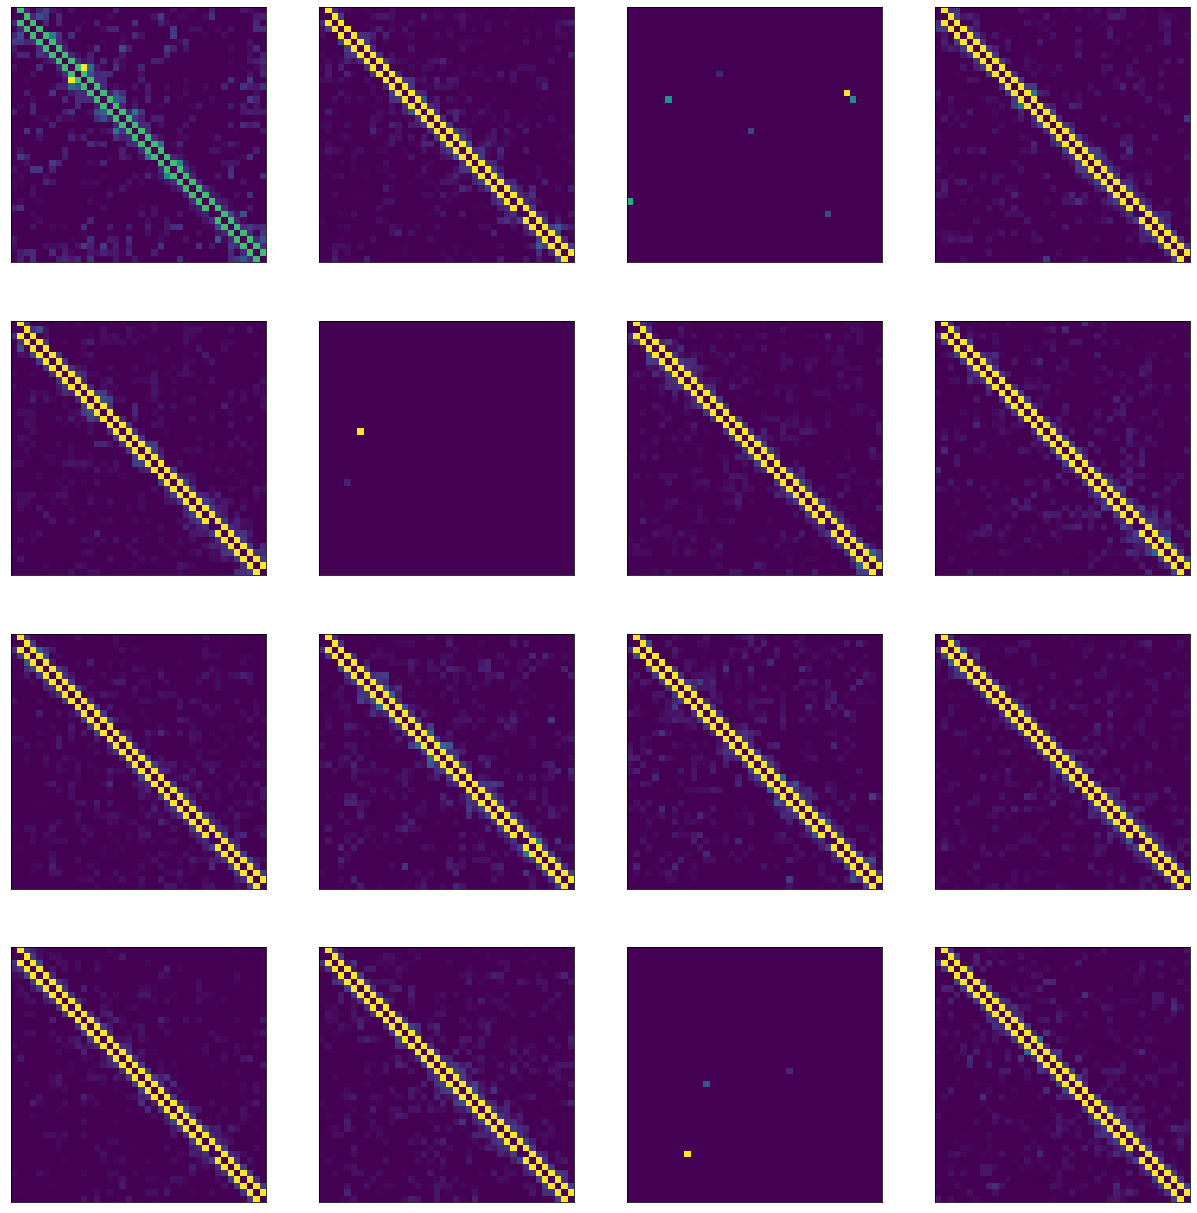

In [39]:
display_dictionary(W = W, figsize = [20,20])

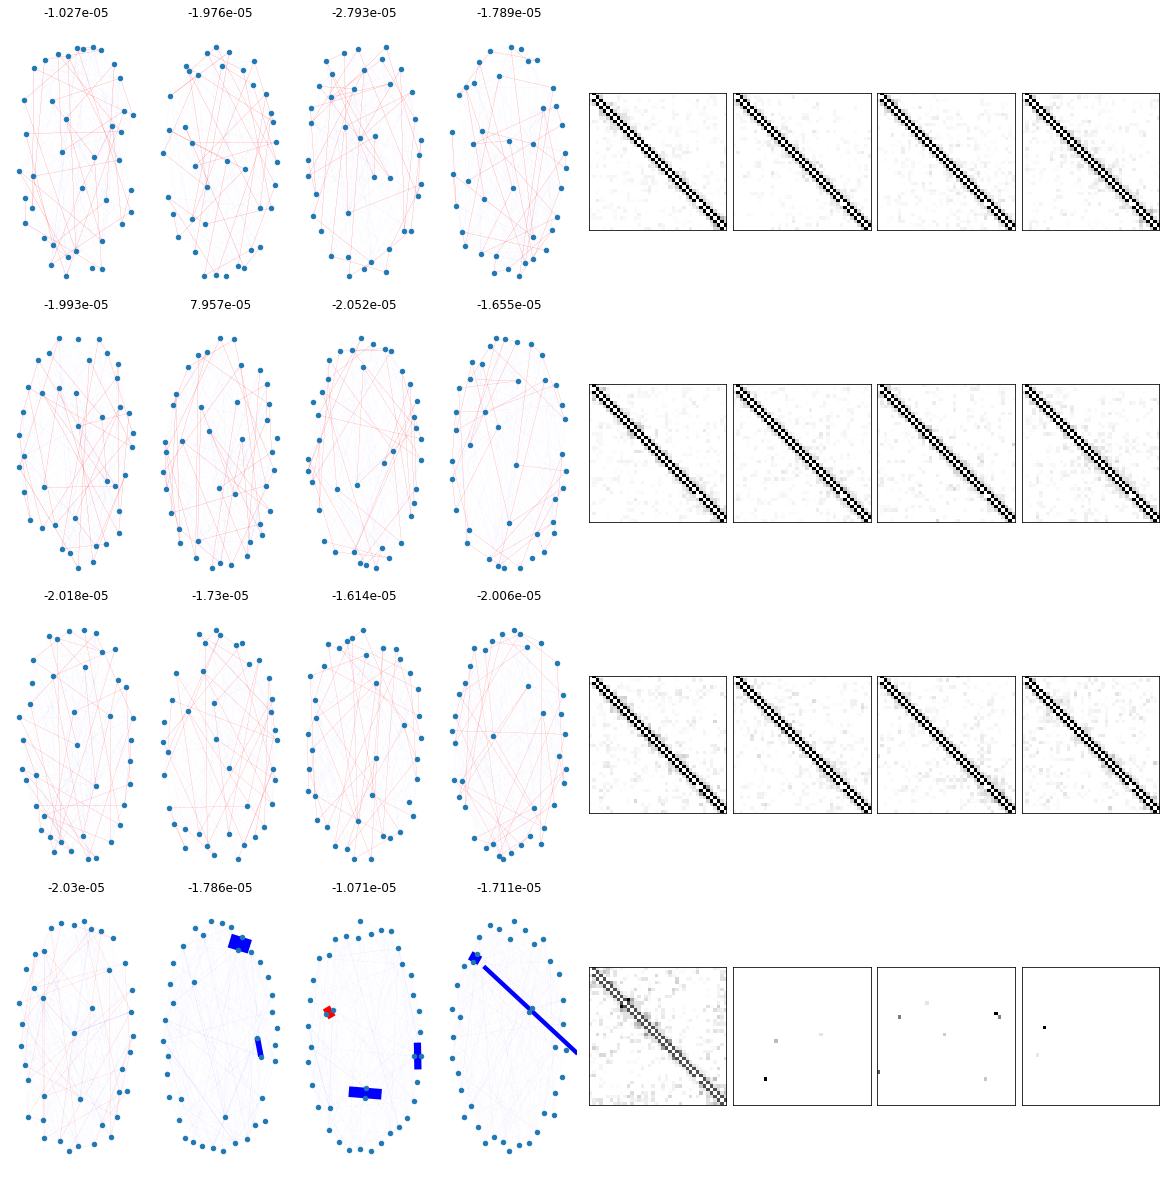

In [40]:
display_dict_and_graph(W = W, 
                       At = np.dot(H, H.T), 
                       regression_coeff = coeff, 
                       weight_graph = 150, 
                       fig_size = [20,20], 
                       show_importance = True)

## SNMF

In [43]:
iteration1 = 200 # Iteration for logistic training
xi_list = [0, 0.1, 1, 5, 10] # Trade-off parameters
beta = 1
iter_avg = 4
r = 16

SNMF_AUC_array = np.zeros(shape = [iter_avg, len(xi_list)]) 

for j in range(len(xi_list)):
    xi = xi_list[j]
    for i in range(iter_avg):
        SNMF_class_new20 = SNMF(X = [X20_train.T, Y20_train.T],
                              X_test = [X20_test.T, Y20_test.T],
                              n_components = r,
                              xi = xi,
                              L1_reg = [0,0,0],
                              L2_reg = [0,0,0],
                              nonnegativity = [True,True,False],
                              full_dim = False)

        results_dict_new20_snmf = SNMF_class_new20.train_logistic(iter = iteration1, 
                                                                 subsample_size = None, 
                                                                 beta = beta,
                                                                 search_radius_const = 1,
                                                                 update_nuance_param = False,
                                                                 if_compute_recons_error = False, 
                                                                 if_validate = False)

        SNMF_AUC_array[i, j] = results_dict_new20_snmf.get('Accuracy')

xi_SNMF = xi_list[np.argmax(np.sum(SNMF_AUC_array, 0))]

initial loading beta [[-0.17157481  0.1315965  -0.14180566  0.2491859  -0.57765745  0.80564076
  -0.40739332 -0.080519    0.42231008  0.34017665  0.19667533 -0.63429175
   0.22943394  0.24383139 -0.5773648   0.16410126 -0.50787375]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 43.83it/s]


initial loading beta [[ 0.26406728  0.11385713 -0.4786081  -0.80408012  0.12705243  0.59030613
   0.92734251  0.88334827 -0.17225302 -0.57678392 -0.1101261  -0.67419113
   0.59413278 -0.05979031  0.29336717  0.4180443   0.26102612]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 43.31it/s]


initial loading beta [[ 0.52293127  0.98208429 -0.39527003 -0.6468762   0.38211118  0.03222806
  -0.45620845 -0.37189517  0.34581273  0.75782476 -0.48163597  0.01498568
   0.01345256 -0.24865344  0.16696803 -0.67228754 -0.53682703]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 47.63it/s]


initial loading beta [[ 0.28411616  0.37432026  0.95315809 -0.3760286   0.7640208   0.66448875
   0.3223141  -0.03366365  0.41074817  0.15771137  0.7420784   0.62242229
  -0.85369281  0.87417855 -0.12614413 -0.47006598  0.78631453]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 47.68it/s]


initial loading beta [[ 0.81330477 -0.47122249 -0.93425379  0.56524526  0.17667086 -0.07681113
  -0.37196111  0.62093189 -0.16537647 -0.46062895 -0.41089234 -0.33722302
  -0.39413684  0.29647048 -0.85439967 -0.03053197 -0.24266293]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 43.73it/s]


initial loading beta [[ 0.83945815 -0.58320795  0.01367579  0.97649931  0.26724643 -0.33837471
  -0.09796513 -0.38802368 -0.04711534  0.35985935  0.84841248  0.16904954
   0.67455508 -0.34759589 -0.67882426  0.71547146 -0.73061325]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 43.58it/s]


initial loading beta [[-0.92815937  0.50466731 -0.67432581  0.28941792 -0.61694923 -0.36111574
   0.81937951  0.23326865  0.94403268  0.10538903 -0.078615    0.1697832
  -0.18252445  0.67696968 -0.21986718 -0.4937972   0.83424878]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 44.20it/s]


initial loading beta [[ 0.78494368 -0.56145821 -0.22320847  0.26196425 -0.3341823   0.25783382
   0.93936084  0.12264655  0.38979385 -0.12394922  0.89144888 -0.9218197
   0.46409134 -0.62376794  0.14689397 -0.83626116  0.87824414]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 44.81it/s]


initial loading beta [[ 0.46882789 -0.27526086  0.61526375 -0.91486766 -0.63632024 -0.61180992
  -0.39636316  0.40841711  0.6794297  -0.19420282  0.41131095 -0.56720978
   0.86681898  0.88165832 -0.62259528  0.09787684  0.7232424 ]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 43.87it/s]


initial loading beta [[ 0.31265353 -0.74716327  0.6314994  -0.15059553 -0.58909921 -0.33560129
  -0.7221714  -0.44622012 -0.14363442 -0.66962368  0.10991828  0.83278642
  -0.1838539   0.10760494 -0.48116493 -0.00491319  0.0833335 ]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 37.19it/s]


initial loading beta [[ 0.09555891 -0.18126888 -0.40733693 -0.28519613  0.72141523  0.70276042
   0.37533639  0.09356137 -0.22488942  0.36675732 -0.62448476 -0.60722895
   0.56565051  0.15550494 -0.86641373  0.52385758  0.4881033 ]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 35.56it/s]


initial loading beta [[-0.35628686 -0.92181765 -0.48557349 -0.68492535  0.15011601 -0.87694175
   0.59609761 -0.36157605  0.36173185 -0.81734596 -0.93332042 -0.77857279
  -0.70595538 -0.93163437 -0.59996966 -0.49777049  0.47767781]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 37.77it/s]


initial loading beta [[ 0.18467952  0.16357967  0.50320634  0.16436088  0.55423355  0.2269519
   0.24707042 -0.01920241 -0.86007295 -0.33112623  0.92030052 -0.77495847
  -0.63345936  0.79119022  0.70123465 -0.00898685 -0.53661182]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 44.54it/s]


initial loading beta [[ 0.63314556 -0.81161993  0.88906434  0.87112454  0.39315212  0.47631433
  -0.27469065  0.63997654 -0.00860919 -0.04810856 -0.19719495 -0.33837334
   0.63674822  0.37920131 -0.05920909 -0.07474866  0.09984265]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 38.68it/s]


initial loading beta [[-0.09015253 -0.65397111 -0.07290519 -0.18088678 -0.9526402  -0.26369855
  -0.9463127   0.05573524 -0.583881    0.82223391 -0.98491843 -0.48584665
   0.37452864 -0.04895843 -0.6291452   0.69197812 -0.81755225]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 35.61it/s]


initial loading beta [[ 0.48691629 -0.63142014 -0.56376657 -0.12067408 -0.64384812 -0.29431823
  -0.8821013  -0.97769721  0.31638501 -0.17239249 -0.1824473   0.87563343
  -0.48379159  0.03458935 -0.39349922  0.59192582  0.44298206]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 35.93it/s]


initial loading beta [[ 0.92307266 -0.04787915  0.15564311 -0.65410603  0.71426015 -0.68973956
   0.16065777 -0.30432598  0.10186531  0.20670917 -0.46212361 -0.35449382
  -0.67653851 -0.74107524 -0.84758772  0.30517505 -0.94768592]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 36.76it/s]


initial loading beta [[-0.36647028 -0.60621941  0.64025968 -0.13177129 -0.59839122  0.48109134
   0.40127216 -0.6492889   0.15254058  0.94203021 -0.65782954  0.35246671
   0.48629497 -0.09989838  0.1924679   0.40394378  0.91567373]]


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 34.60it/s]


initial loading beta [[ 0.60746648  0.96118767  0.17981839 -0.19346436  0.08861102  0.44136537
   0.465675    0.33945271 -0.56703958  0.26951408 -0.18057097 -0.247813
   0.93064961 -0.69070086 -0.28922765 -0.99625749 -0.14146451]]


100%|█████████████████████████████████████████| 200/200 [00:07<00:00, 27.15it/s]


initial loading beta [[-0.50320834 -0.75850334  0.21809063 -0.02158383 -0.02974588  0.27680379
  -0.51548767 -0.08282928 -0.78328088  0.68796805 -0.54209082 -0.13994913
  -0.94206531  0.1337513  -0.2489559  -0.29275829  0.67932116]]


100%|█████████████████████████████████████████| 200/200 [00:04<00:00, 41.82it/s]


In [44]:
W = results_dict_new20_snmf['loading'][0]
coeff = results_dict_new20_snmf['loading'][1][0]
H = results_dict_new20_snmf['code']

In [46]:
print('Accuracy: {}'.format(results_dict_new20_snmf['Accuracy']))

Accuracy: 0.5422222222222223


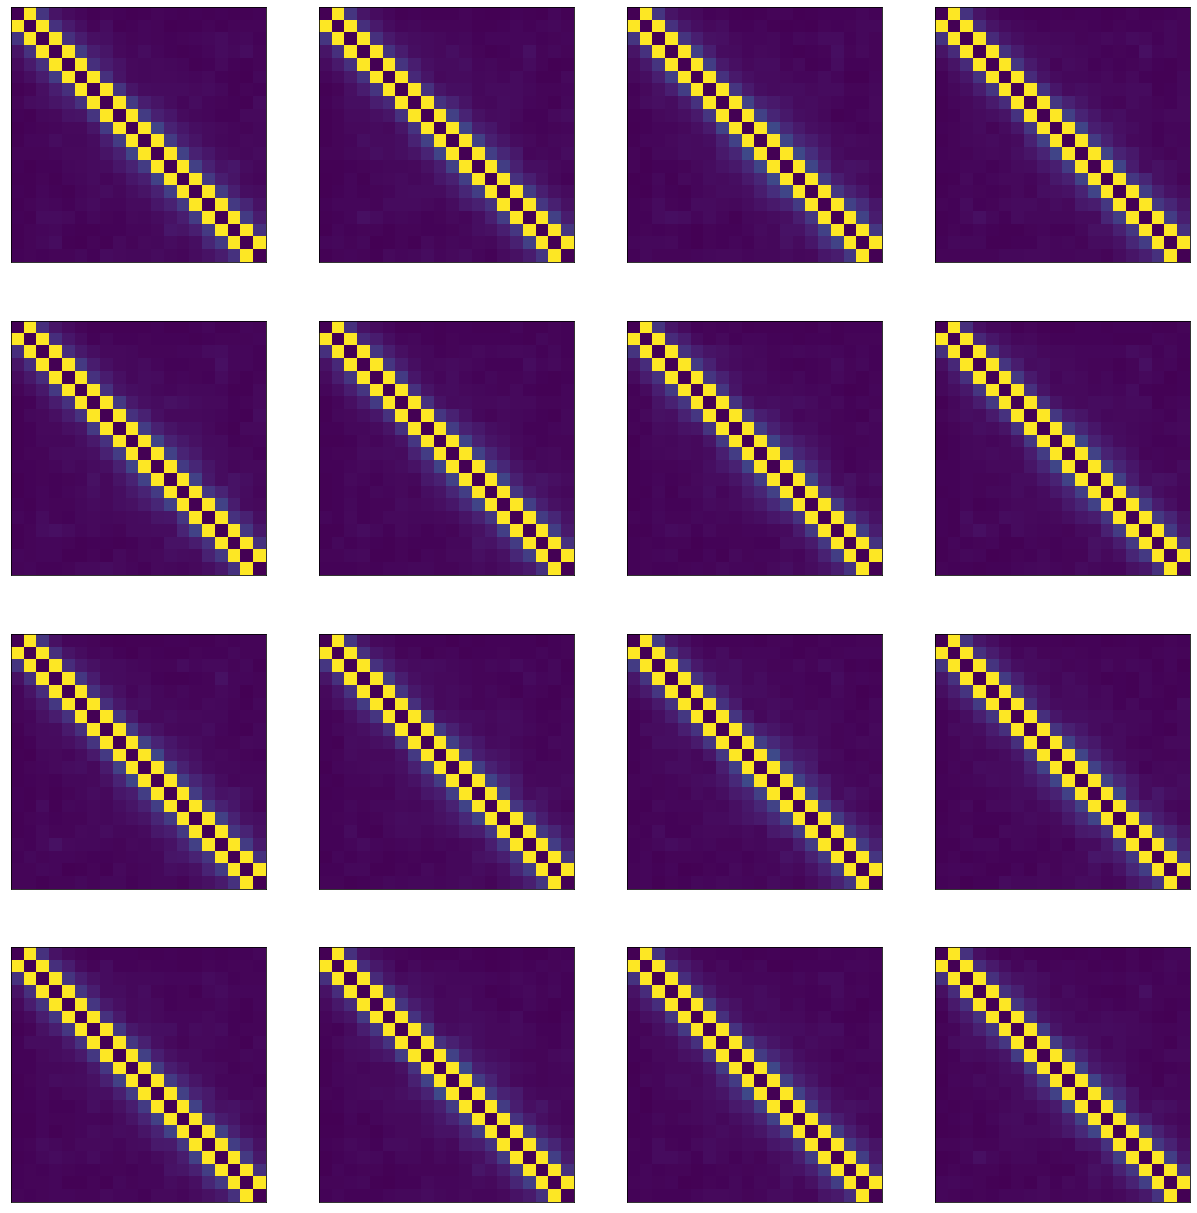

In [48]:
display_dictionary(W = W, figsize = [20,20])

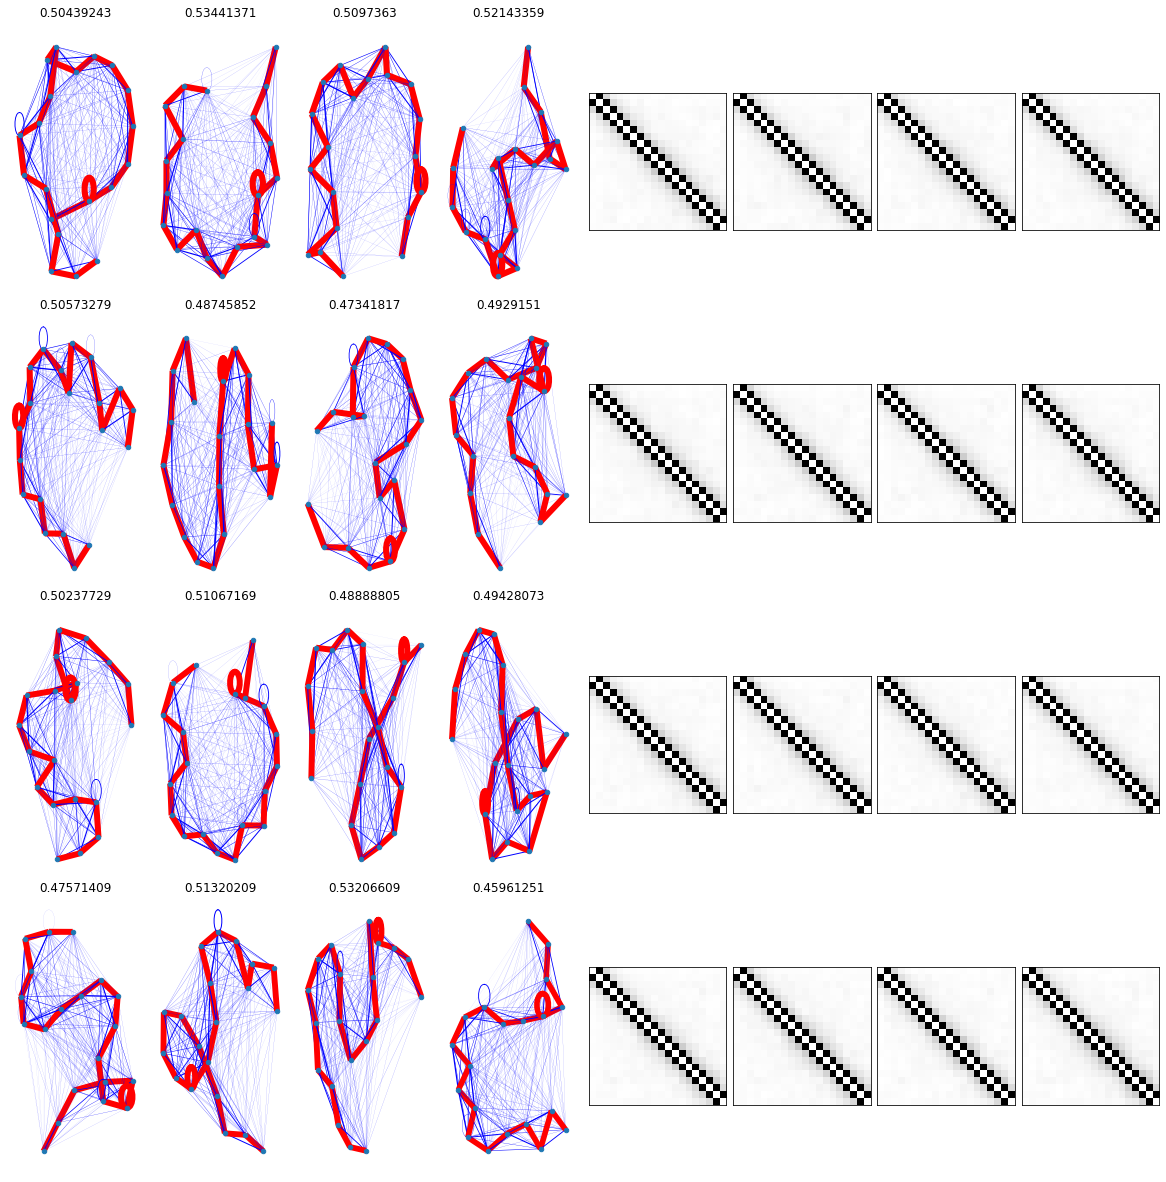

In [50]:
display_dict_and_graph(W = W, 
                       At = np.dot(H, H.T), 
                       regression_coeff = coeff, 
                       weight_graph = 150, 
                       fig_size = [20,20], 
                       show_importance = True)

In [49]:
iteration1 = 200 # Iteration for logistic training
xi_list = [0, 0.1, 1, 5, 10] # Trade-off parameters
beta = 1
iter_avg = 4
r = 16

SNMF_AUC_array = np.zeros(shape = [iter_avg, len(xi_list)]) 

for j in range(len(xi_list)):
    xi = xi_list[j]
    for i in range(iter_avg):
        SNMF_class_new40 = SNMF(X = [X40_train.T, Y40_train.T],
                              X_test = [X40_test.T, Y40_test.T],
                              n_components = r,
                              xi = xi,
                              L1_reg = [0,0,0],
                              L2_reg = [0,0,0],
                              nonnegativity = [True,True,False],
                              full_dim = False)

        results_dict_new40_snmf = SNMF_class_new40.train_logistic(iter = iteration1, 
                                                                 subsample_size = None, 
                                                                 beta = beta,
                                                                 search_radius_const = 1,
                                                                 update_nuance_param = False,
                                                                 if_compute_recons_error = False, 
                                                                 if_validate = False)

        SNMF_AUC_array[i, j] = results_dict_new40_snmf.get('Accuracy')

xi_SNMF = xi_list[np.argmax(np.sum(SNMF_AUC_array, 0))]

initial loading beta [[ 0.3233187  -0.6860735   0.13919737  0.49168165  0.80264025  0.19461717
  -0.34548492  0.65567139 -0.80073432  0.01830686  0.87160871  0.8772793
   0.16798518  0.01480701  0.55464675 -0.1310319  -0.60993243]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 16.84it/s]


initial loading beta [[ 0.86377318  0.17973695  0.91277967 -0.07319255  0.13517297 -0.18866004
  -0.7191095  -0.57880094  0.86281899  0.95918673 -0.01615485  0.8220917
  -0.37400986  0.2322279   0.86675482 -0.39436285 -0.09288147]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 15.50it/s]


initial loading beta [[-0.60681086  0.28125633  0.97446844  0.43942586 -0.3585576  -0.55471528
  -0.74361707  0.98839696  0.07439184  0.72601257  0.79384158 -0.44238442
   0.8357657   0.32689945 -0.04114369 -0.7510526  -0.065226  ]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.24it/s]


initial loading beta [[-0.55716666  0.77466482  0.57497283  0.06383645 -0.5088134   0.16930669
  -0.68061919 -0.52062793 -0.36981619 -0.30122563 -0.06081585 -0.22328651
  -0.20665665 -0.82452886  0.84363587  0.96407701  0.03857999]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 17.05it/s]


initial loading beta [[ 0.64299551 -0.36779014 -0.67452476 -0.62647811 -0.3214607  -0.55269434
  -0.86621181 -0.5540684  -0.04653299 -0.86634701 -0.25324174 -0.50811399
  -0.27912658 -0.20877966 -0.67283594 -0.42057611  0.00883991]]


100%|█████████████████████████████████████████| 200/200 [00:13<00:00, 15.04it/s]


initial loading beta [[-0.07159826 -0.11979112  0.15028117  0.78857999 -0.10999817  0.12426674
   0.68883183  0.54213191 -0.40335759  0.25939654 -0.61530959  0.59885735
  -0.40738252  0.9321546   0.68633813  0.07201312  0.83530706]]


100%|█████████████████████████████████████████| 200/200 [00:13<00:00, 14.89it/s]


initial loading beta [[ 0.89570376  0.32510288 -0.49644901  0.56479128  0.92287707 -0.51486806
  -0.30442375  0.32598246 -0.92961692 -0.13394786 -0.34553688 -0.7323704
  -0.30768537  0.40424481  0.48837346 -0.14071672  0.98244345]]


100%|█████████████████████████████████████████| 200/200 [00:15<00:00, 13.00it/s]


initial loading beta [[ 0.21788738 -0.98071803  0.65601846  0.36672363 -0.87087586 -0.80715582
   0.44969393  0.7547869   0.58294219  0.66526962  0.71276317 -0.25994181
   0.27043961  0.3819001  -0.98482016  0.35407417 -0.79620885]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.17it/s]


initial loading beta [[ 0.09453643 -0.91595055  0.19466749  0.24520965 -0.27517288  0.71312156
   0.15691166  0.744834   -0.05237352 -0.68849979 -0.48929486  0.69108038
  -0.4453091  -0.41493874  0.32124283  0.1098511   0.95984432]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.60it/s]


initial loading beta [[ 0.16657099 -0.6149145   0.32752391  0.26075045 -0.14144017  0.38924078
   0.55155598  0.62663521  0.71374857  0.16658915 -0.09840492 -0.39409383
   0.88709415  0.30097755 -0.51920114  0.66421762  0.27571169]]


100%|█████████████████████████████████████████| 200/200 [00:10<00:00, 18.98it/s]


initial loading beta [[ 0.04977434 -0.70619493 -0.9341199  -0.57767737  0.87039128  0.92141845
  -0.01920148  0.15926583 -0.45049136 -0.67207955  0.59606597 -0.04449484
  -0.22550741 -0.40920382 -0.83155118 -0.43813118 -0.19195261]]


100%|█████████████████████████████████████████| 200/200 [00:09<00:00, 20.09it/s]


initial loading beta [[-0.05001643 -0.33794134  0.84492856  0.56829973  0.83360544 -0.83675721
   0.25111331  0.69098661  0.52907216 -0.04991651  0.50226273  0.62963242
   0.49509984 -0.99138225  0.90081142 -0.30388477 -0.12824102]]


100%|█████████████████████████████████████████| 200/200 [00:10<00:00, 19.67it/s]


initial loading beta [[ 0.54233557  0.59967587  0.49189577  0.46587047  0.95360589  0.70902274
   0.27895845 -0.13219026  0.92035031 -0.86551255 -0.91886821  0.34076182
   0.19343619 -0.02126188  0.42884085 -0.27368366  0.67880871]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 16.72it/s]


initial loading beta [[ 0.72815184 -0.13308692  0.58027848  0.10965136  0.72568863 -0.65126515
   0.16308997 -0.11029144 -0.67412554  0.6145946  -0.38959208 -0.52425959
  -0.21086801  0.51603211  0.85296114  0.65396853 -0.42892414]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 18.18it/s]


initial loading beta [[-0.58979872 -0.78653804 -0.88533582 -0.80485247  0.97031048  0.78742813
   0.7475696  -0.49507684 -0.62862017 -0.89510936  0.06759086  0.00162551
   0.18777633 -0.96674008 -0.67157369  0.90533876  0.11183916]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 17.84it/s]


initial loading beta [[ 0.41452709  0.6029961  -0.83096883  0.95698712  0.13501826  0.03130074
   0.99763447 -0.56824777 -0.01530373 -0.84920253 -0.42955538  0.17094479
  -0.23094857 -0.62636252  0.72525937 -0.85711108 -0.6677145 ]]


100%|█████████████████████████████████████████| 200/200 [00:10<00:00, 18.53it/s]


initial loading beta [[ 0.04837573  0.75071881 -0.27996942 -0.92739942  0.45329536 -0.74024638
   0.32447959 -0.49180489 -0.84797139 -0.96879028  0.29050005  0.85013996
   0.77365795 -0.03261697  0.19676133 -0.44641091 -0.85502364]]


100%|█████████████████████████████████████████| 200/200 [00:12<00:00, 16.14it/s]


initial loading beta [[ 0.12421423  0.12399902  0.92332882 -0.26551602  0.76752204 -0.59226487
   0.82992998  0.01244666 -0.83390615 -0.67683357  0.66891236 -0.49742908
   0.44193893  0.00631426 -0.85601882  0.48855648  0.88465739]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 17.78it/s]


initial loading beta [[ 0.33849712 -0.55131088  0.58935892  0.30395437  0.7055487  -0.59384628
  -0.92674869  0.72176086 -0.10729728 -0.69514743  0.39190398  0.61736892
  -0.99934814 -0.57424407  0.11220051  0.46274346 -0.95515713]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 18.14it/s]


initial loading beta [[ 0.56032142  0.07368002  0.93061101  0.04184969  0.24580359  0.58280423
  -0.87412999 -0.61239444  0.28998324  0.88678255 -0.98502011 -0.84391463
  -0.0255408   0.05724595 -0.62223408  0.36992197  0.91883245]]


100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 17.40it/s]


In [51]:
W = results_dict_new40_snmf['loading'][0]
coeff = results_dict_new40_snmf['loading'][1][0]
H = results_dict_new40_snmf['code']

In [52]:
print('Accuracy: {}'.format(results_dict_new40_snmf['Accuracy']))

Accuracy: 0.6


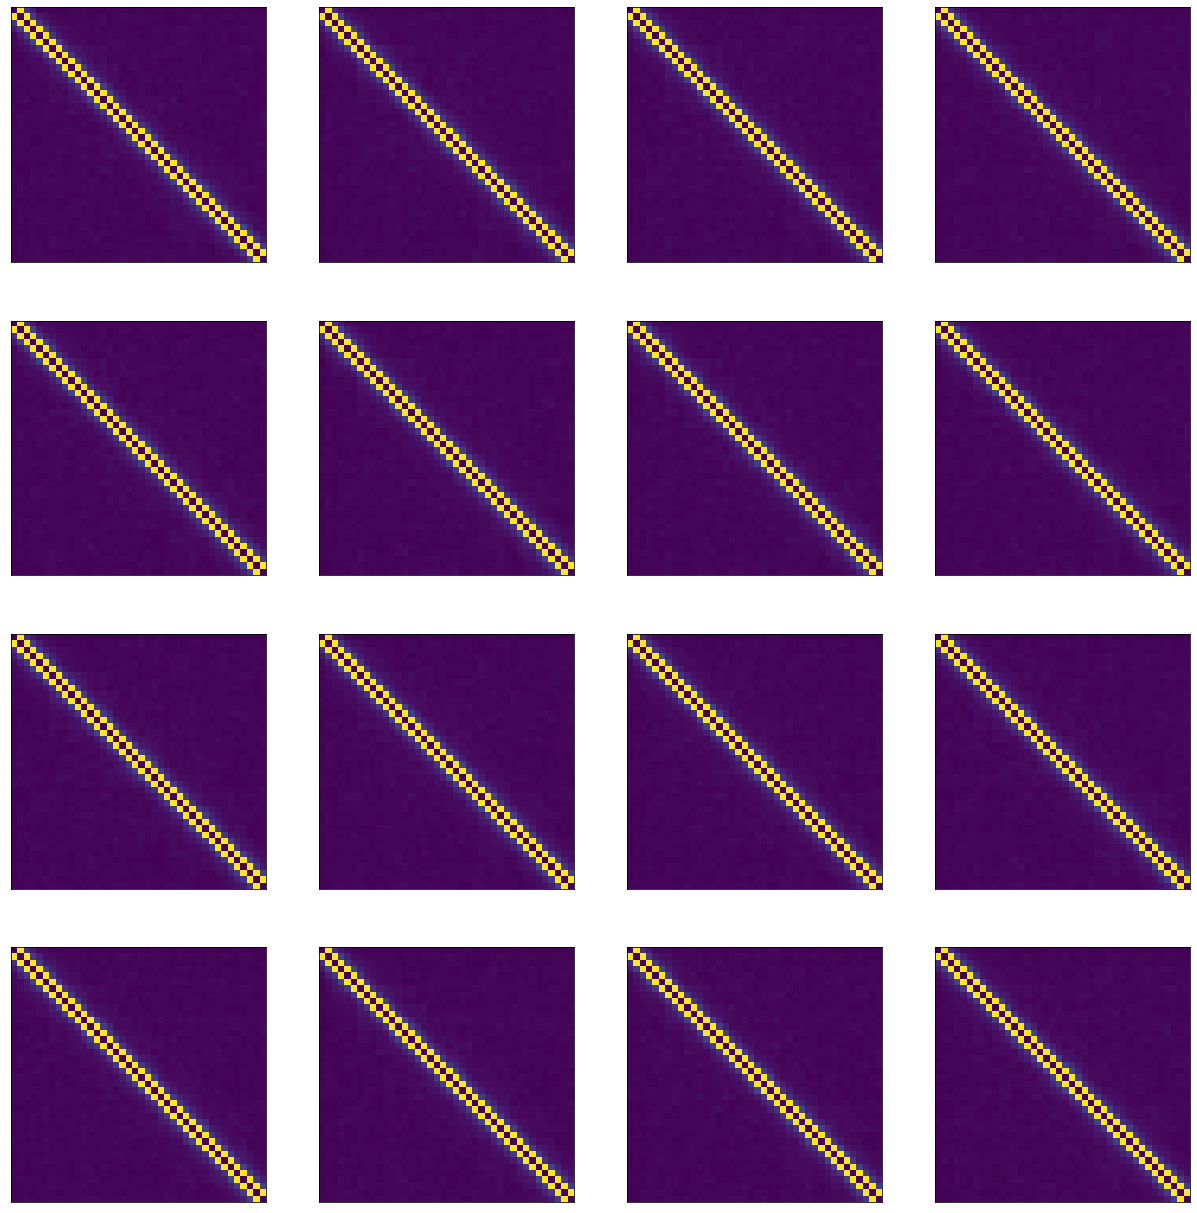

In [53]:
display_dictionary(W = W, figsize = [20,20])

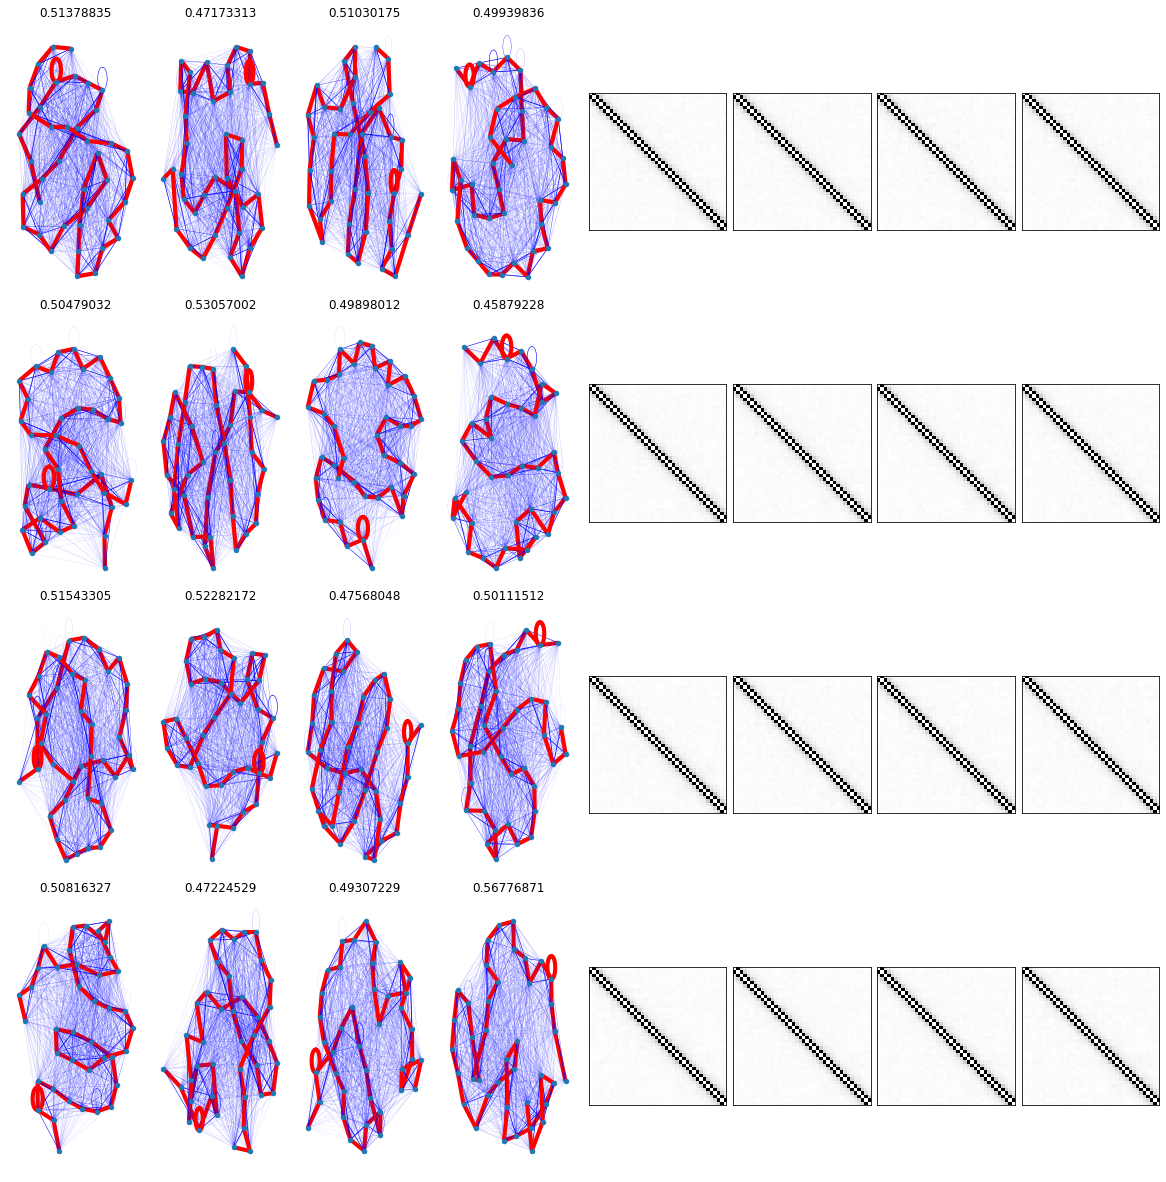

In [54]:
display_dict_and_graph(W = W, 
                       At = np.dot(H, H.T), 
                       regression_coeff = coeff, 
                       weight_graph = 150, 
                       fig_size = [20,20], 
                       show_importance = True)